<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classifying-street-signs-using-Deep-Learning" data-toc-modified-id="Classifying-street-signs-using-Deep-Learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classifying street signs using Deep Learning</a></span><ul class="toc-item"><li><span><a href="#Background/Motivation:" data-toc-modified-id="Background/Motivation:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background/Motivation:</a></span></li><li><span><a href="#Libraries,-Functions,-Loading-Data" data-toc-modified-id="Libraries,-Functions,-Loading-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Libraries, Functions, Loading Data</a></span><ul class="toc-item"><li><span><a href="#Data-Loading-/-Image-Processing-Functions:" data-toc-modified-id="Data-Loading-/-Image-Processing-Functions:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Data Loading / Image Processing Functions:</a></span></li></ul></li><li><span><a href="#Image-Preprocessing:" data-toc-modified-id="Image-Preprocessing:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Image Preprocessing:</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Load-Image-Data:" data-toc-modified-id="Load-Image-Data:-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Load Image Data:</a></span></li></ul></li><li><span><a href="#Modeling:" data-toc-modified-id="Modeling:-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Modeling:</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model:" data-toc-modified-id="Baseline-Model:-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Baseline Model:</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model-Evaluation:" data-toc-modified-id="Baseline-Model-Evaluation:-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Baseline Model Evaluation:</a></span></li></ul></li><li><span><a href="#Tuned-Model" data-toc-modified-id="Tuned-Model-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Tuned Model</a></span></li></ul></li><li><span><a href="#Analysis:" data-toc-modified-id="Analysis:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Analysis:</a></span></li><li><span><a href="#Ethical-Considerations:" data-toc-modified-id="Ethical-Considerations:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Ethical Considerations:</a></span></li><li><span><a href="#Future-Improvements:" data-toc-modified-id="Future-Improvements:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Future Improvements:</a></span></li></ul></li></ul></div>

In [0]:
#https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/

# Classifying street signs using Deep Learning

## Background/Motivation:
<br>

According to the [National Safety Council](https://www.nsc.org/road-safety/safety-topics/fatality-estimates), approximately 40,000 people died in automotive accidents in the United States in 2018.  Since the invention of the automobile, manufacturers have steadily added more safety features and improved car design over time with the goal of keeping drivers safer on the road. Automotive manufacturers have spent millions of dollars researching safety improvements for seatbelts, tires, and pretty much every car piece or part imaginable. Despite all of this investment, driving remains substantially more fatal than alternatives such as [air travel](https://www.theguardian.com/world/2019/jan/02/plane-crash-deaths-jump-sharply-in-2018-but-fatalities-still-rare) in 2019. 
<br>
![src: http://yonah.org/channel/visionhack-computer-vision-russia/](computervisionexample.jpg)
*Image Source: yonah.org*
<br>
<br>

While there are many factors that likely contribute to this drastic difference, such as the varying difficulty in training and certification required to be a commercial pilot vs obtaining a drivers licence, the difference in mortality rate remains staggering. In fact, there were a total of ~500 deaths resulting from plane crashes recorded globally in 2018 - that's **80 times** fewer deaths when compared to car crash fatalities **in the US only**.

Through the advent of artificial intelligence, we're now able to apply new techniques to many "old" problems, including automotive safety. 

> Today, companies such as Tesla, Volvo, and many others are investing into technology such as Artificial Intelligence that seeks to correct the root cause of the issue, and the one we've previously ignored - *human performance behind the wheel*.


Perhaps the most exciting advancement in automative technology since the invention of the car itself is the birth of the self-driving, or autonomous car.  Once the topic of Science Fiction, Convolutional Neural Networks (CNNs) and other modeling techniques have pushed the bounds of "possible" into the realm of human imagination. There are 3 major challenges we must overcome in order to make self driving technology possible. We must be able to do the following, very quickly:

> 1. Obtain the data (sensors, cameras)
> 2. Process the data (artificial intelligence - our focus here)
> 3. Act on the data (drive the car)
<br>
<br>

![Self Driving Car Sensor Example](SelfDriveCarSensors.jpg)
*Image courtesy of https://www.sae.org/*
<br>
<br>

In this experiment, we'll focus exclusively on a simplified application of step 2, *processing image data in order to determine what it is we're "looking at"*, in this case, street signs. To accomplish this goal, 100,000 images containing 43 labeled (pre-classified) street signs were used to train supervised Deep Learning models that utilized CNNs and Transfer Learning to classify each type of street sign.
<br>
<br>

Adhering to the [OSEMN](https://medium.com/breathe-publication/life-of-data-data-science-is-osemn-f453e1febc10) pipeline, we will load image/label data, pre-process/scrub image data, and visualize any trends and noteworthy distributions amongst features/target variables in the dataset prior to modeling.
<br>
<br>

Following exploratory data analysis, we'll use Deep Learning methods, CNNs and Transfer Learning to classify the street signs in the database. When evaluating the results of our models, it is important to consider the potential ramifications of a mistake. In the case of self-driving cars, a misidentified stop sign *or pedestrian* could cost a life. However, for the purposes of this inquiry, we will not define an "acceptable" margin of error.
<br>
<br>

In a future study, the importance of misclasification of each sign could be evaluated, given a weight, and the experiment should be repeated. In this way, a new model could be trained to "err on the side of caution" when classifying more critical street signs. Additionally, the ethics behind these choices should be evaluated. If our weighted inputs caused our new model to make fewer mistakes classifying stop signs, for example, but performed slightly worse on classifying pedestrian crossing signs, would that be "acceptable"? These are the types of evaluations that must be considered before we "hand over the keys" entirely.

To improve the experiment further, additional sign-data could be generated using Generative Adversarial Networks (GANs) and used to improve model performance. Based on model performance, fatality could then be predicted using available crash statistics in order to give context to the performance of each model.
<br>
<br>

Notebooks/Links of Interest:**
- [Image Preprocessing](/image_preprocessing.ipynb)
- Keynote (see directory)

## Libraries, Functions, Loading Data

In [1]:
# Libraries -
# General:
import pandas as pd
import numpy as np
import pickle
import IPython
from math import sqrt, ceil, floor
import itertools
from itertools import cycle
import time

# Keras:
import keras
from keras import Model, Sequential, layers, models, optimizers
from keras.utils.np_utils import to_categorical
from keras.layers import AveragePooling2D, AvgPool2D, Conv2D, MaxPool2D, GlobalAvgPool2D, Dropout, Dense, Flatten

# Sklearn:
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree, svm, linear_model
from sklearn.decomposition import PCA
from keras.models import Sequential
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
from sklearn import svm, datasets

import tensorflow as tf

from scipy import interp

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Blues')
%matplotlib inline

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Data Loading / Image Processing Functions:

## Image Preprocessing:

Follow the instructions below. Take note below when loading pickle files to replace the google drive reference with your own. For more information on how to connect your Google Drive with Colab to take advantage of the added GPU power, reference [this link](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# uncomment and run if you have issues or need to switch drives
# drive.mount("/content/drive", force_remount=True)'''

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import Data for chosen pickle file:
# See Image Preprocessing nb for more info -
#pickle_in = open("data/data_dict_2.pickle","rb") # Home Directory
pickle_in = open("/content/drive/My Drive/capstone/data/data_dict.pickle","rb") # Colab
data_dict = pickle.load(pickle_in)
data = data_dict
#/content/drive/My Drive/capstone/data/data_dict.pickle (your Gdrive reference here)

Before beginning our modeling and analysis, we'll briefly discuss how convolutional neural networks allow us to train computers to identify objects. As humans, when we look at a picture, like the example of the "Whatever I choose" below, we see a cute dog with black and grey fur. Without thought, we know that the subject of the image isn't a horse, car, or cat. Computers, unsurprisingly, have no notion of what a dog is, much less what one looks like. Instead, computers see images as grouped matrices called **tensors**. In each matrix, each number corresponds to a specific pixel in the image. Put simply, an image with the dimensions of 32x32x3 contains 3 matrices (representing the Red, Green, and Blue color channels) that are 32 pixels in height, and 32 pixels in width.

Using a convolutional neural network, we are able to train models to extract image "features" such as edges, shapes, and colors. Using supervised learning techniques, we can pass thousands of images of dogs of all breeds through a model in order to "teach the computer" what a dog looks like. So, while a computer may not appreciate how cute my dog Oliver is, by applying different filters to his portrait, it can determine that Oliver's facial structure, color, and shape share similarities with other dogs.

![gif](Oliver.gif)

## Data Exploration

In the dataset, the labels corresponding to the 43 types of street signs (our target classes) are stored in a separate CSV file. To give context to our model's performance, we will load this file for review and for later use in labeling our model output.

In [4]:
# Collab Import Label Names
label_names_df = pd.read_csv('/content/drive/My Drive/capstone/data/label_names.csv')
label_names_df.set_index('ClassId')
display(label_names_df.head())
print('\n')
display(label_names_df.SignName.unique())

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

In [0]:
'''# From Home Directory - Don't run in colab
# Load label names data
label_names_df = pd.read_csv('data/label_names.csv')
display(label_names_df.SignName.unique())
label_names_df.head()'''

"# From Home Directory - Don't run in colab\n# Load label names data\nlabel_names_df = pd.read_csv('data/label_names.csv')\ndisplay(label_names_df.SignName.unique())\nlabel_names_df.head()"

### Load Image Data:

Reviewing available data in directory:

In [0]:
'''# Don't run this block in colab
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('data'))'''

"# Don't run this block in colab\nimport os\nfor dirname, _, filenames in os.walk('data'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\nprint(os.listdir('data'))"

Loading an example and taking a look at data:

In [5]:
# Dataset Info:
print(f'"data" dictionary keys: {data.keys()}')
print(f'Number Training Examples: {len(data["x_train"])}')
print(f'Number of Test Samples: {len(data["x_test"])}')
print(f'Image Shape: {data["x_test"][0].shape}')
print(f'Number of Target Classes: {len(label_names_df)}') # Softmax output shape for modeling
class_num = data['y_test'][1]
data['labels'][class_num]

"data" dictionary keys: dict_keys(['y_test', 'y_validation', 'x_validation', 'x_train', 'y_train', 'labels', 'x_test'])
Number Training Examples: 86989
Number of Test Samples: 12630
Image Shape: (32, 32, 3)
Number of Target Classes: 43


'Right-of-way at the next intersection'

As we can see, our data has already been segmented into training and testing sets, stored as keys as dictionary keys. Next, we will preview a few samples from each of our target classes to better understand the inputs to our model.

Here, we will display an example of a sign from the first 20 classes. As we'll see below, some of the images appear to be very dark and don't offer much in terms of detail.

In [0]:
# Aggregating Individual examples of signs
images_with_classes = [
  (x, data['labels'][data['y_test'][i]]) 
      for (i,x) in enumerate(data['x_test'])]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

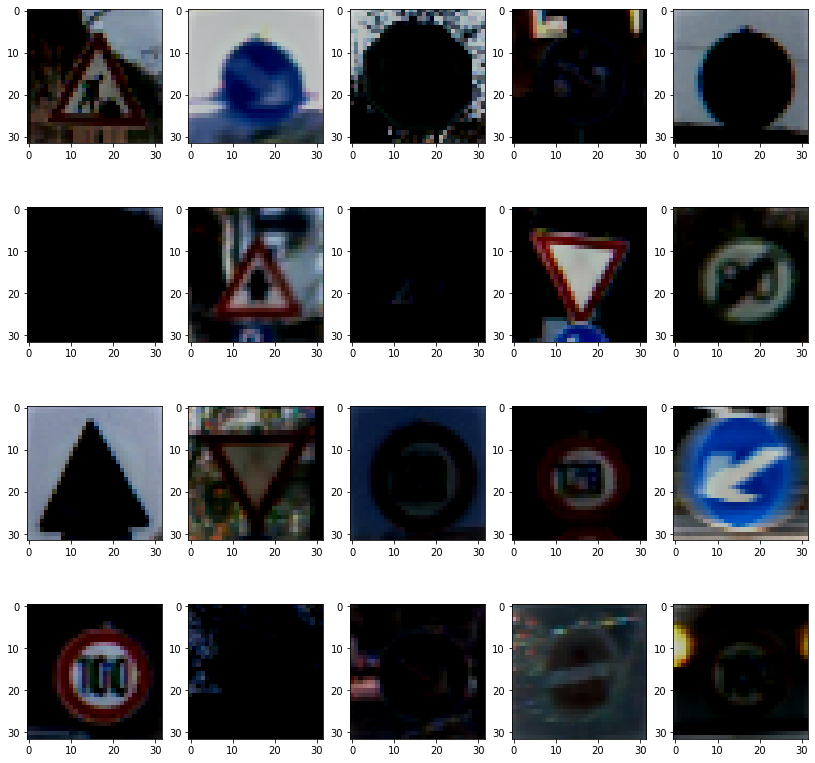

In [7]:
fig,ax = plt.subplots(nrows=4, ncols=5, figsize=(14,14))
for i in range(4):
  for j in range(5):
    #ax[i,j].imshow(images_with_classes[i+j][0])
    image_number = i*4 + j*5  
    ax[i,j].imshow(images_with_classes[image_number][0])

Next, let's take a brief look at the class distribution within our training dataset to confirm class normalization following image pre-processing.

In [8]:
# Evaluate
y_train_trans = data['y_train'].transpose()


y_train_df = pd.DataFrame.from_dict(data=y_train_trans.transpose())
y_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
y_train_df.rename(mapper=label_names_df.SignName, axis=1, inplace=True)
y_train_df.head()

,Speed limit (20km/h),Speed limit (30km/h),Speed limit (50km/h),Speed limit (60km/h),Speed limit (70km/h),Speed limit (80km/h),End of speed limit (80km/h),Speed limit (100km/h),Speed limit (120km/h),No passing,No passing for vehicles over 3.5 metric tons,Right-of-way at the next intersection,Priority road,Yield,Stop,No vehicles,Vehicles over 3.5 metric tons prohibited,No entry,General caution,Dangerous curve to the left,Dangerous curve to the right,Double curve,Bumpy road,Slippery road,Road narrows on the right,Road work,Traffic signals,Pedestrians,Children crossing,Bicycles crossing,Beware of ice/snow,Wild animals crossing,End of all speed and passing limits,Turn right ahead,Turn left ahead,Ahead only,Go straight or right,Go straight or left,Keep right,Keep left,Roundabout mandatory,End of no passing,End of no passing by vehicles over 3.5 metric tons
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


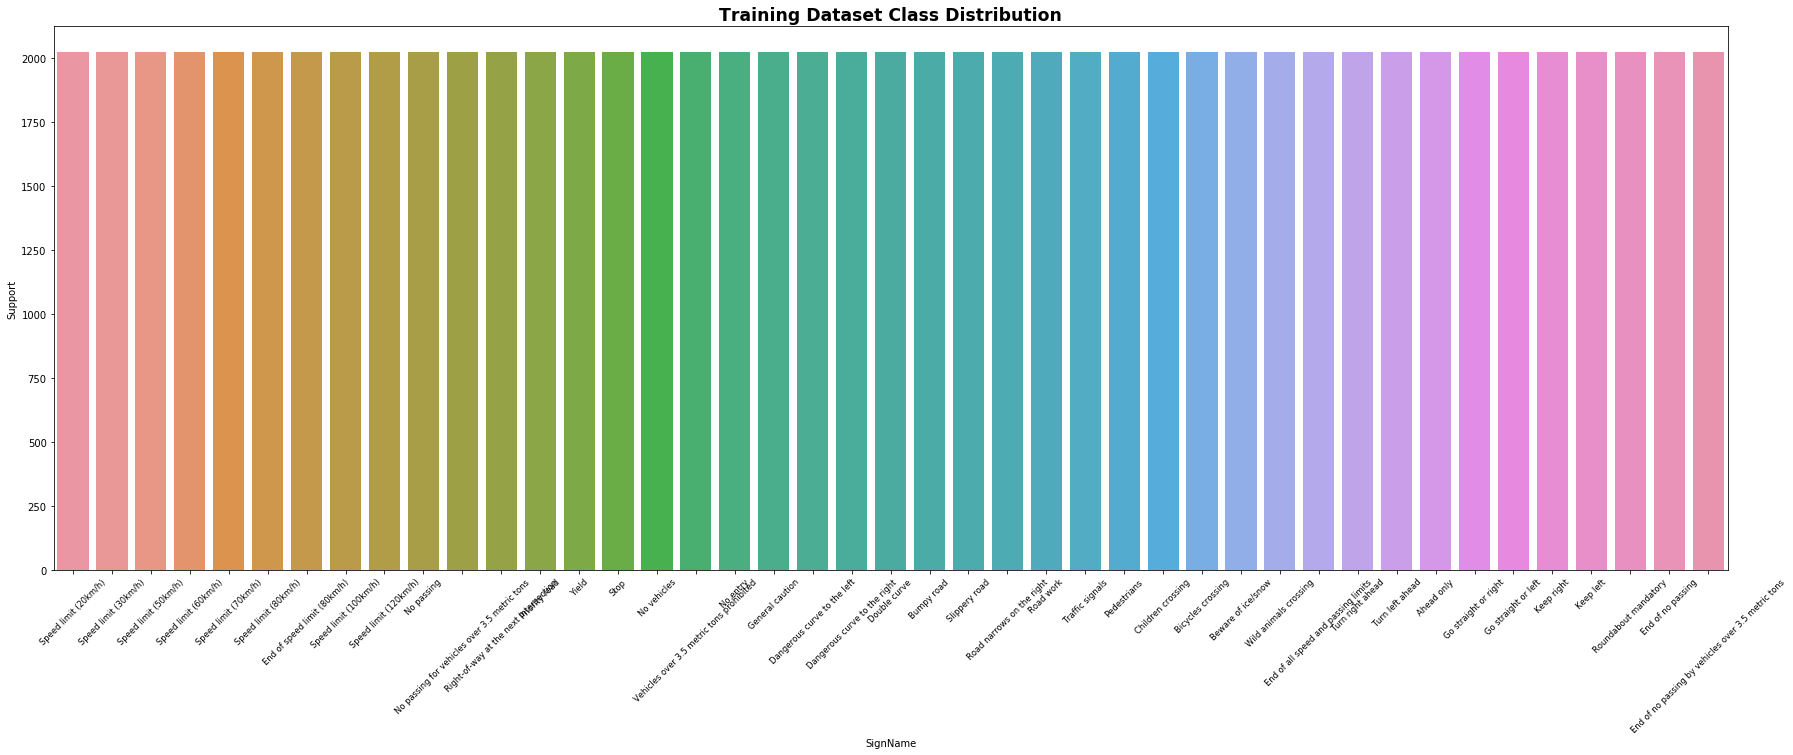

In [10]:
column_totals = []
for col in y_train_df.columns:
  column_totals.append(y_train_df[col].sum())
label_names_df['Support'] = column_totals

fig = plt.figure(figsize=(30,10))
plt.title('Training Dataset Class Distribution', fontweight='bold', fontsize='xx-large')
ax = sns.barplot(x=label_names_df.SignName, y=label_names_df.Support)
ax.set_xticklabels(labels=label_names_df.SignName, rotation=45, fontsize='small')
plt.show()

In [11]:
len(label_names_df) # Softmax output shape

43

## Modeling:

To begin, we'll perform a "light" analysis with a simple Convolutional Neural Network (CNN) to verify that data is being pre-processed correctly and establish a baseline model.

### Baseline Model:

With each step along the way, we'll define functions to compile, train, and analyze additional models.

In [0]:
# Build / Compile Basic Model:
def compile_basic_model(optimizer, loss):
  '''Builds/Compiles Basic CNN, with user defined optimizer/loss
  example: "adam", "categorical_crossentropy"'''
  # Build Basic Model:
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPool2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dense(250, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(150, activation='relu'))
  model.add(Dense(43, activation='softmax'))
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
        
  return model

In [13]:
model = compile_basic_model(optimizer='adam', loss='categorical_crossentropy')
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4096500   
_________________________________________________________________
dense_2 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               50200     
_________________________________________________________________
dense_4 (Dense)              (None, 150)        

Next, let's review the model created by the output of the 'compile_basic_model' function above. 

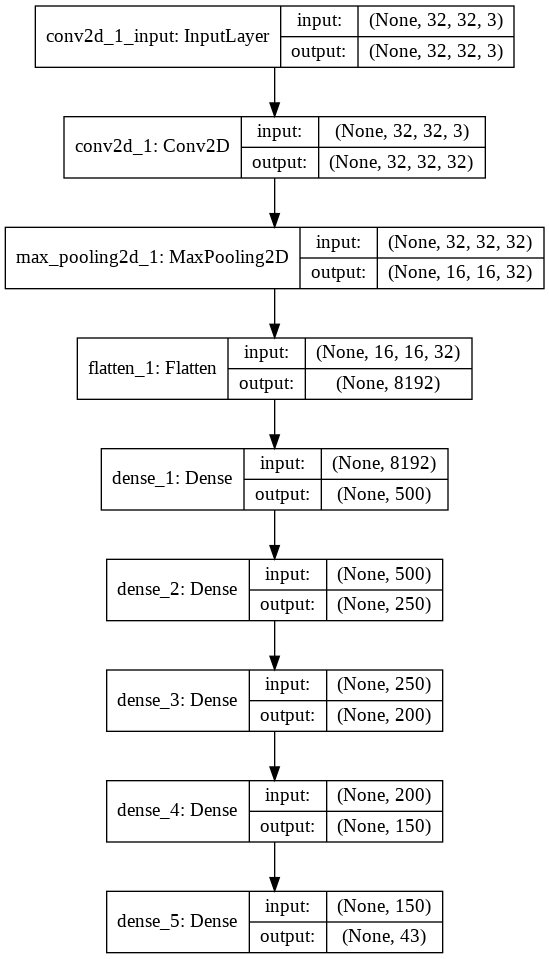

In [14]:
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model.png')

To get a better understanding of what's going on under the hood, let's create our own visualization as well.

<br>

![figure](basic_model_visual.png)

With the help of the figure above, summarizing our very basic CNN, we'll briefly discuss what is happening in each layer of the model we summarized above.

First, we have our input images, all with dimensions of 32x32x3, or more simply, images that are 32 pixels in height and width, with 3 color channels (RGB). Because these inputs differ from those of other neural networks, where model inputs are vectors, we'll need to massage our input images in order to reliably classify them using Deep Learning.

Following the figure above, the first layer applied to the input image is a Convolutional layer. In this step, we apply a convolutional kernel to our image, effectively sliding a smaller 3x3 pixel filter over the input image, evaluating their dot products. In the case above, we've chosen to apply 32 filters in this convolutional step, resizing the dimensionality of the layer output.

Next, a pooling layer is applied to reduce the dimensionality (and therefore parameters) of model input using a sliding 2x2 filter, selecting the maximum value for each "window" or "chunk" of our parsed image input.

Finally, in order to massage our image input into a vectorized format compatible with the dense layers we'll use to classify our images we flatten the image input into an array.

In order to get a better understanding of the convolutional layers in our model, we'll next visualize the intermediate activations at each layer.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


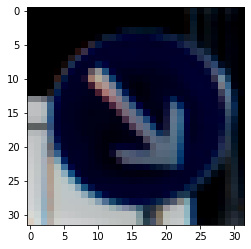

In [15]:
# Selecting an example image
example = plt.imshow(data['x_train'][2, :, :, :])
plt.savefig('example.jpg')

In [16]:
# Creating a basic CNN:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Flatten())

classifier.add(Dense(500, activation='relu'))
classifier.add(Dropout(.1))
classifier.add(Dense(250, activation='relu'))
classifier.add(Dropout(.1))
classifier.add(Dense(200, activation='relu'))
classifier.add(Dropout(.25))
classifier.add(Dense(150, activation='relu'))
classifier.add(Dense(43, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
# Training:
history = classifier.fit(
    x = data['x_train'], 
    y = data['y_train'],
    batch_size=10,
    epochs=10,
    validation_data=(data['x_validation'], data['y_validation']))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 86989 samples, validate on 4410 samples
Epoch 1/10





86989/86989 [==============================] - 68s 778us/step - loss: 0.8501 - acc: 0.7379 - val_loss: 0.5494 - val_acc: 0.8351
Epoch 2/10
86989/86989 [==============================] - 59s 676us/step - loss: 0.2983 - acc: 0.9162 - val_loss: 0.5344 - val_acc: 0.8630
Epoch 3/10
86989/86989 [==============================] - 59s 679us/step - loss: 0.2295 - acc: 0.9365 - val_loss: 0.5635 - val_acc: 0.8680
Epoch 4/10
86989/86989 [==============================] - 59s 673us/step - loss: 0.2004 - acc: 0.9466 - val_loss: 0.5353 - val_acc: 0.8814
Epoch 5/10
86989/86989 [==============================] - 58s 671us/step - loss: 0.1856 - acc: 0.9531 - val_loss: 0.7395 - val_acc: 0.8574
Epoch 6/10
86989/86989 [==============================] - 58s 671us/step - loss: 0.1896 - acc: 0.9547 - val_loss: 0.6773 - val_acc: 0.8823
Epoch 7/10
8698

In [18]:
from keras.preprocessing import image
import imageio as im

img = im.imread('example.jpg')
img.shape

(288, 432, 3)

In [0]:
# Loading/Preprocessing our example:
# img_path='example.jpg' # Home Directory
img_path = '/content/drive/My Drive/capstone/example.jpg' # Colab
img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
# Selecting outputs of classifier:
layer_outputs = [layer.output for layer in classifier.layers[:2]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


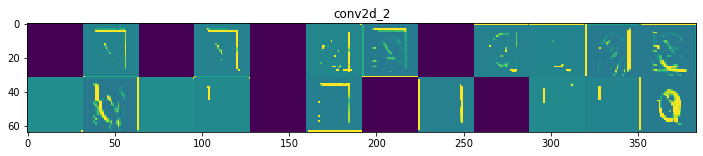

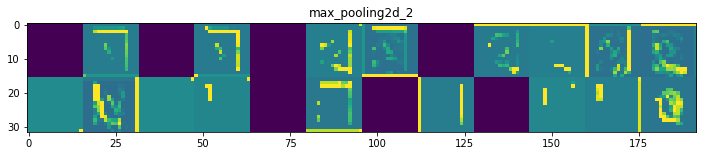

In [22]:
# Code for visualization obtained from:
# https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md
layer_names = []
for layer in classifier.layers[:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 12

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.savefig('basic_cnn_intermediate_activations.jpg')

While we can see the highlighting of edges and shapes in the image above, our outputs don't appear very "clear" to the human eye. Let's now evaluate how the above model performs in classifying images from the testing set by creating a function to fit a model using the output of the 'compile_basic_model' function defined above. Because the dataset is large, the function will also allow the user to index a subset of the training set to reduce training time, as well as to define the epochs, and batch size.

Next, we will visualize the accuracy and loss of our model at each epoch. This visualization allows us to determine whether the model is overfitted, underfitted, or in need of tuning before moving forward.

In [0]:
model = compile_basic_model(optimizer='adam', loss='categorical_crossentropy')

In [0]:
# Build History:
def fit_model(model, x, y, sample_num, batch_size, epochs, validation_data):
  '''Fit model, assign x, y, num samples, batch-size, epochs, and validation set'''
  history = model.fit(
    x = data['x_train'][:sample_num], 
    y = data['y_train'][:sample_num],
    batch_size=batch_size,
    epochs=epochs,
    validation_data=validation_data)
  return history, model, batch_size, epochs

In [26]:
# Training model on 10000 samples from training set
history, model, _, _ = fit_model(model=model, x=data['x_train'], y=data['y_train'], batch_size=8, \
                                 epochs=15, sample_num=10000, validation_data=(data['x_validation'], data['y_validation']))

Train on 10000 samples, validate on 4410 samples
Epoch 1/15
10000/10000 [==============================] - 9s 935us/step - loss: 2.2662 - acc: 0.3103 - val_loss: 1.5006 - val_acc: 0.4941
Epoch 2/15
10000/10000 [==============================] - 9s 861us/step - loss: 0.9316 - acc: 0.6957 - val_loss: 1.2077 - val_acc: 0.6760
Epoch 3/15
10000/10000 [==============================] - 9s 864us/step - loss: 0.5233 - acc: 0.8370 - val_loss: 1.1137 - val_acc: 0.7168
Epoch 4/15
10000/10000 [==============================] - 9s 864us/step - loss: 0.3735 - acc: 0.8858 - val_loss: 0.8294 - val_acc: 0.7810
Epoch 5/15
10000/10000 [==============================] - 9s 870us/step - loss: 0.2884 - acc: 0.9115 - val_loss: 0.9962 - val_acc: 0.7676
Epoch 6/15
10000/10000 [==============================] - 9s 861us/step - loss: 0.2588 - acc: 0.9235 - val_loss: 1.0727 - val_acc: 0.7930
Epoch 7/15
10000/10000 [==============================] - 9s 863us/step - loss: 0.2289 - acc: 0.9343 - val_loss: 1.2965 - v

Next, we will visualize the accuracy and loss of our model at each epoch. This visualization allows us to determine whether the model is overfitted, underfitted, or in need of tuning.

In [0]:
def plot_model_acc_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

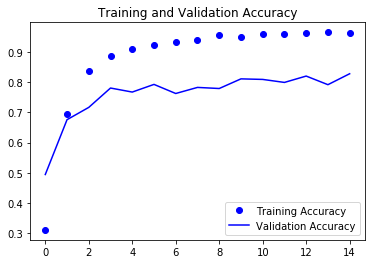

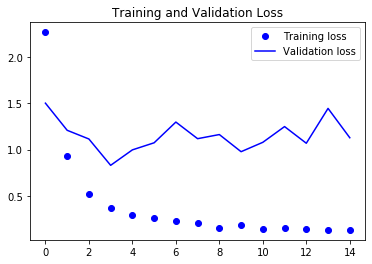

In [28]:
plot_model_acc_loss(history=history)

In this model, we can observe that over 15 epochs, our training accuracy and loss quickly improve, with diminishing returns past the 10th epoch. Meanwhile, the validation accuracy and loss perform significantly worse, signifying that our model is overfit on the training data.

To visualize this effect, we'll continue to analyze the performance of our basic, defining functions we'll use later.

Next, we'll use our model to classify a new set of images from our testing set, and plot a confusion matrix to show our model's performance by class.

In [0]:
# Definining a function to plot confusion matrices:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''Takes input of cm, produced by the sklearn.metrics confusion_matrix function. 
    Example: cnf_matrix = confusion_matrix(y_pred_bool, data['y_test'])
    and classes represents the target classes ex: (set(y_test))'''
    # Check if Normalization Option is Set to True. 
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')
        
    # Print CNF Matrix
    print(cm)
    
    # Create the Matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add Title, Axis Labels:
    # . classes = class_names
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add cell labels:
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

In [30]:
# Predict:
y_pred = model.predict(data['x_test'], batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

#CnF Matix:
cnf_matrix = confusion_matrix(y_pred_bool, data['y_test'])
print('Confusion Matrix:\n', cnf_matrix)

12630/12630 [==============================] - 1s 59us/step
Confusion Matrix:
 [[ 30   4   6 ...   0   0   0]
 [ 15 633  59 ...   0   0   0]
 [  0  23 554 ...   0   0   0]
 ...
 [  0   0   1 ...  76   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  79]]


Confusion Matrix, without Normalization
[[ 30   4   6 ...   0   0   0]
 [ 15 633  59 ...   0   0   0]
 [  0  23 554 ...   0   0   0]
 ...
 [  0   0   1 ...  76   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  79]]


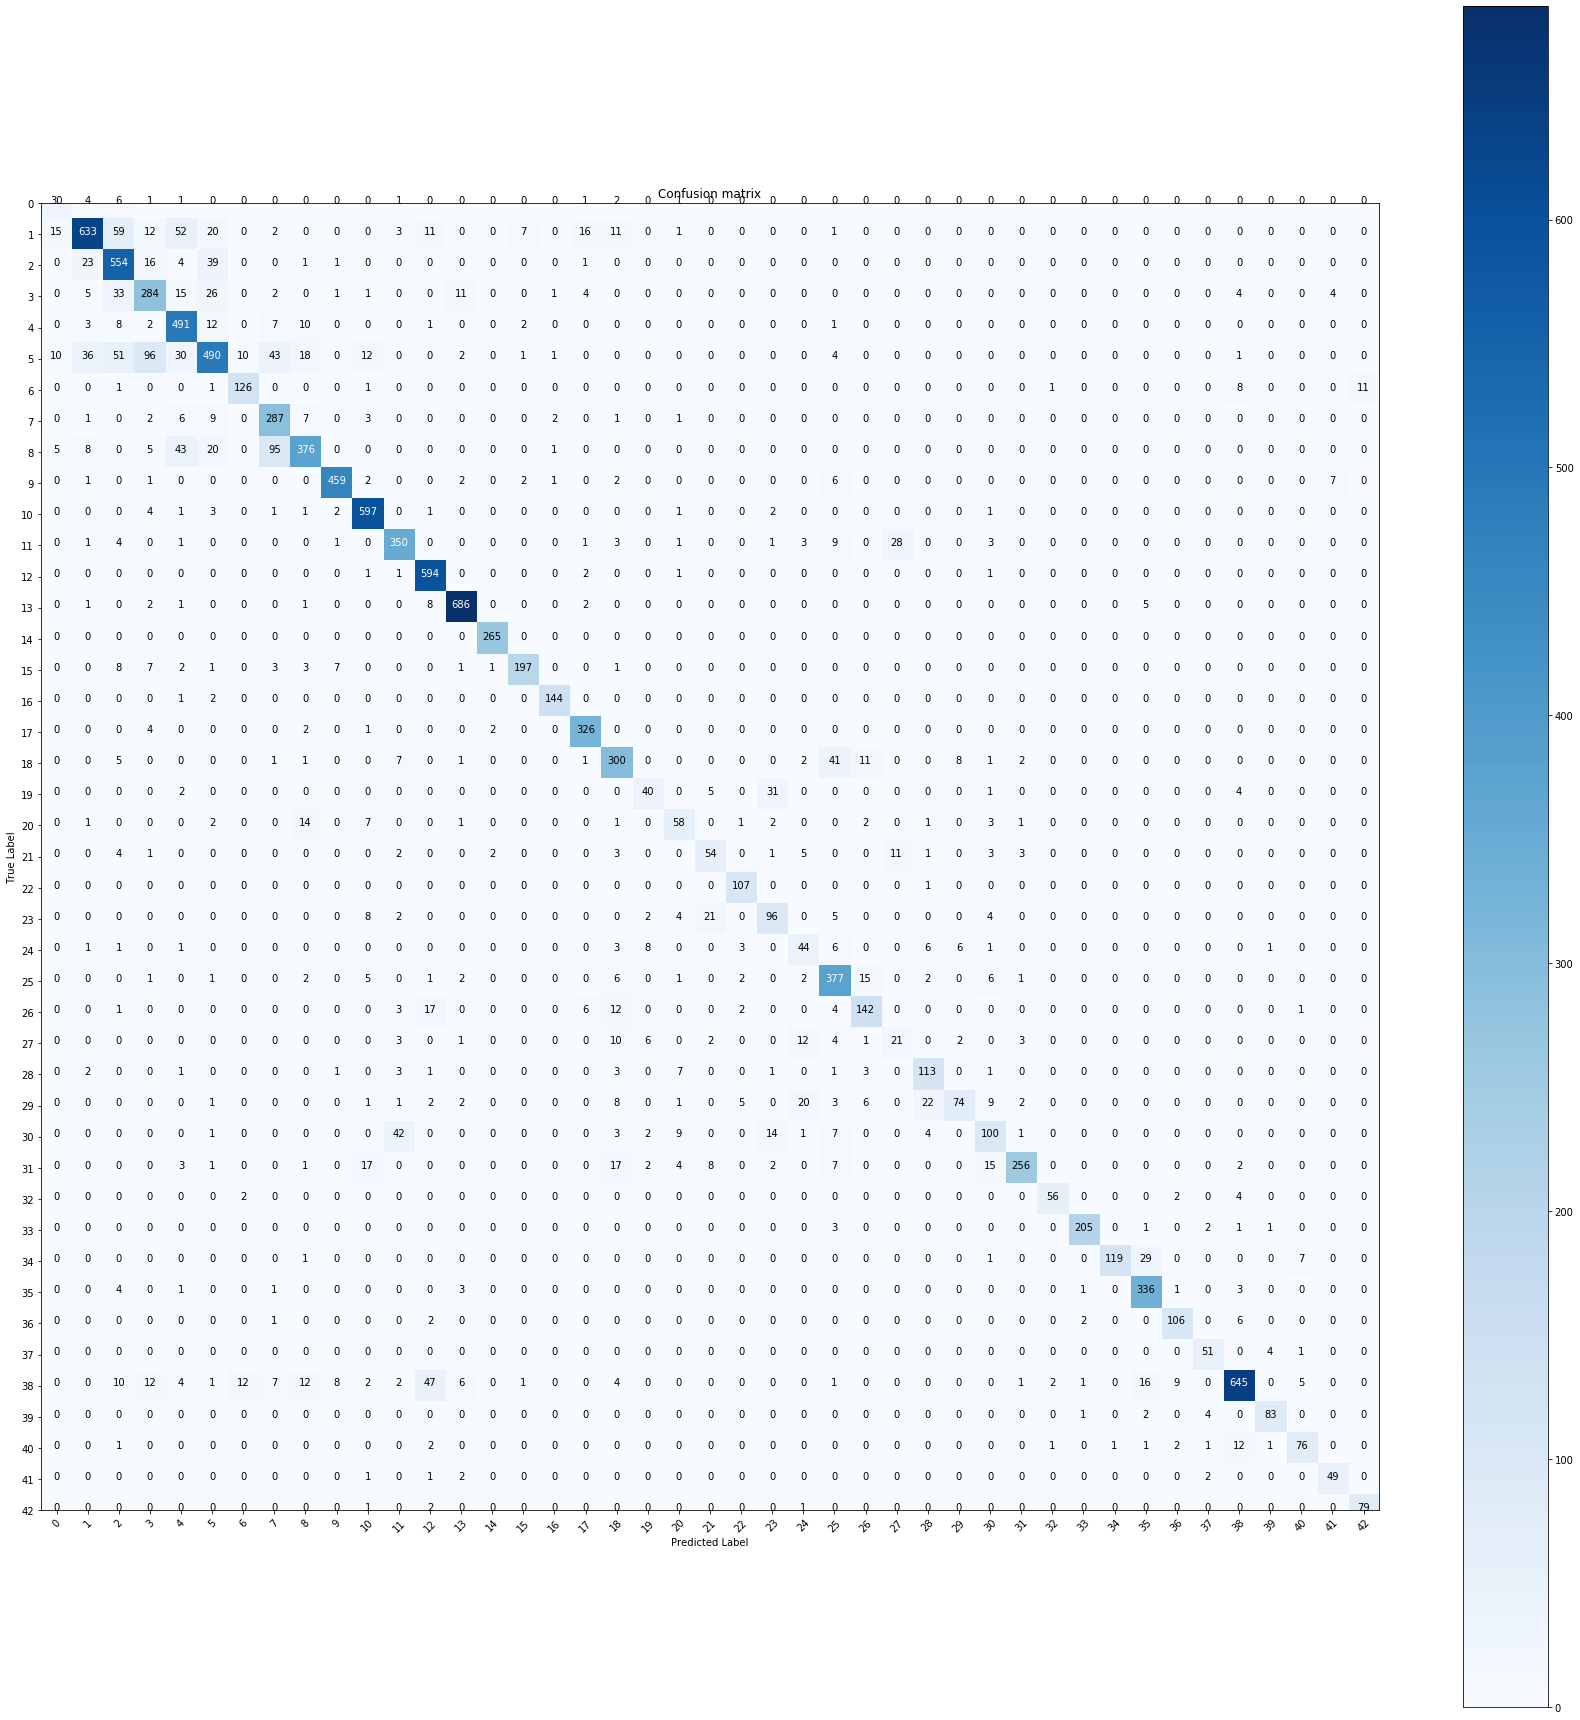

In [31]:
plt.figure(figsize=(24,24))
plot_confusion_matrix(cm=cnf_matrix, classes=range(0,43))

Based on the confusion matrix above, we can observe that model performance varies significantly by class. Before moving forward, we will more closely evaluate class performance.

#### Baseline Model Evaluation:

##### Receiver Operating Characteristic (ROC):
First, we'll review the ROC curve for each target class overlayed in a single, and then plot each target class's ROC curve individually.

Sklearn's [documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
specifies that ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [0]:
# Defining function to plot multiclass ROC Curves in single plot:
def plot_ROC_AUC_all(model, y_test, x_test, n_classes):
  """Takes in a model, y_test, x_test, and number of classes,
  predicts targets and scores model, plotting ROC/AUC curve
  for multiclass targets in a single plot"""

  # Initializing empty dict objects:
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  # Binarize label
  targets = list(set(data['y_test']))
  y = label_binarize(data['y_test'], classes=targets)

  # Predict:
  X_test = data['x_test']
  y_score = model.predict(X_test)

  # Calculate roc_curve for each class in n_classes
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'red', 'green'])

  # Plot ROC/AUC:  
  fig = plt.figure(figsize=(12,10))  
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, \
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
  
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(ncol=2, fontsize='small')
  plt.show()

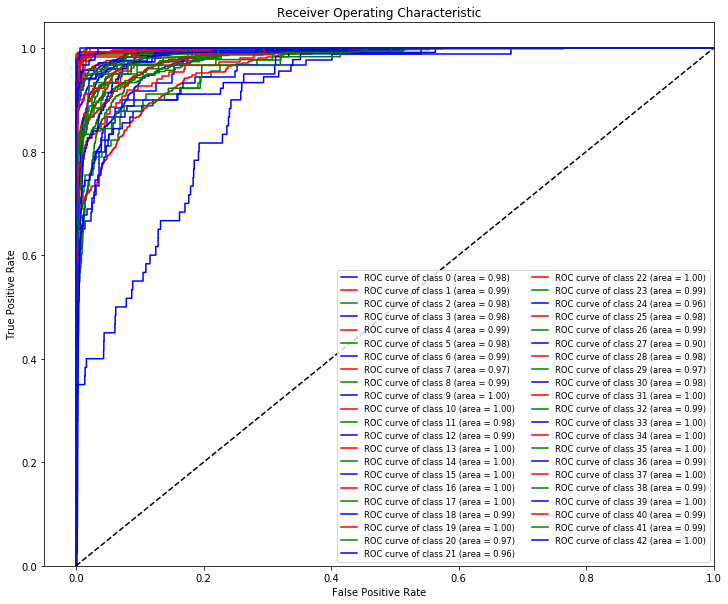

In [34]:
plot_ROC_AUC_all(model=model, y_test=data['y_test'], x_test=data['x_test'], n_classes=43)

From the visualization above, it's easy to visually determine that classification performance varies significantly between target classes. However, because there are 43 target classes in the dataset, it's difficult to identify the best and worst performers from the crowded plot above.

In order to better understand the classifier's performance on each class, we'll also plot the curves separately.

In [0]:
def plot_ROC_AUC_individual(model, y_test, x_test, n_classes):
  """Takes in a model, y_test, x_test, and number of classes,
  predicts targets and scores model, plotting ROC/AUC curve
  for multiclass targets in individual plots"""

  # Initializing empty dict objects:
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  # Binarize label
  targets = list(set(data['y_test']))
  y = label_binarize(data['y_test'], classes=targets)
  #n_classes = 43

  #y_test = data['y_test']
  #X_test = data['x_test']
  

  X_test = x_test
  y_score = model.predict(X_test)

  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    
    colors = cycle(['blue', 'red', 'green'])
    
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, \
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend()
    plt.show()

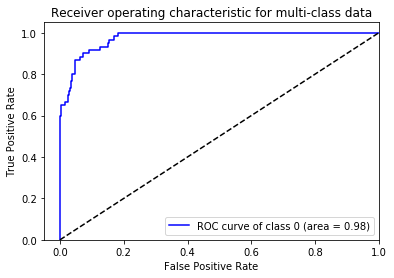

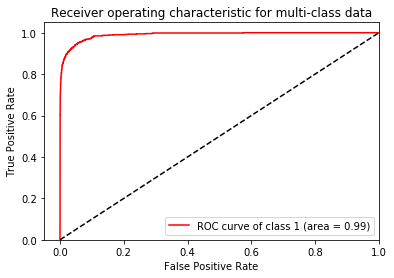

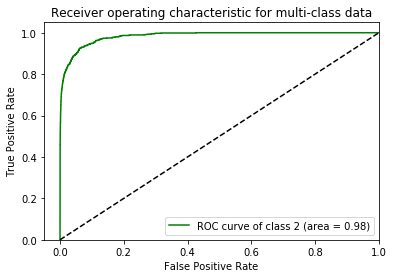

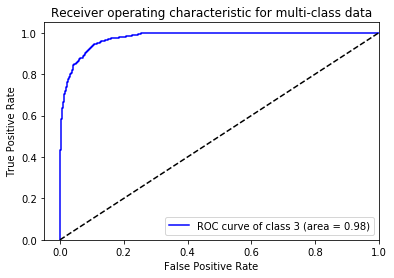

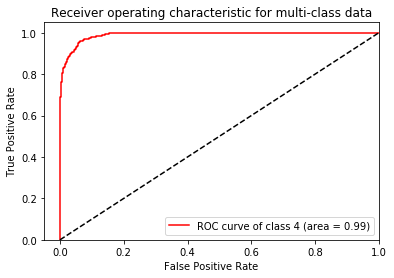

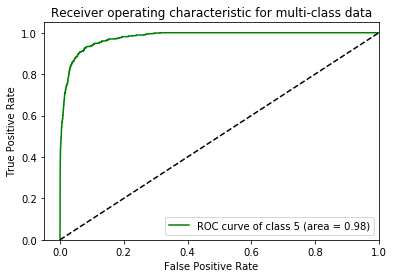

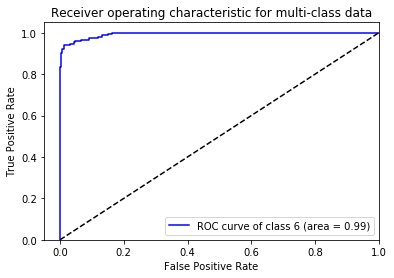

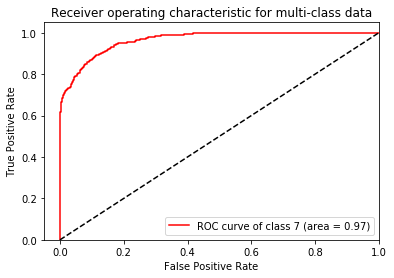

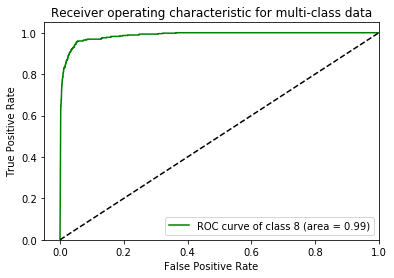

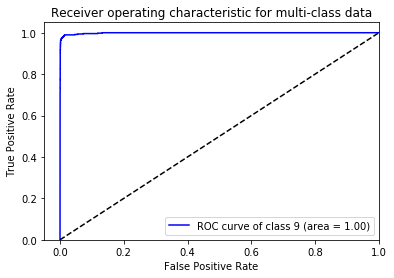

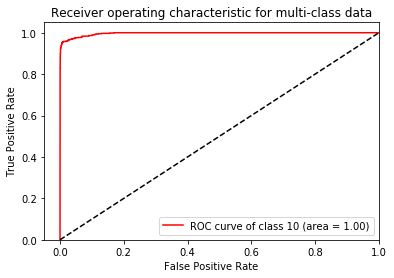

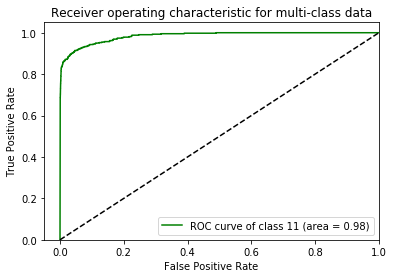

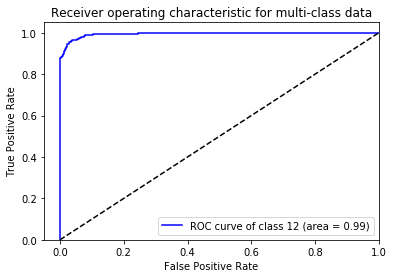

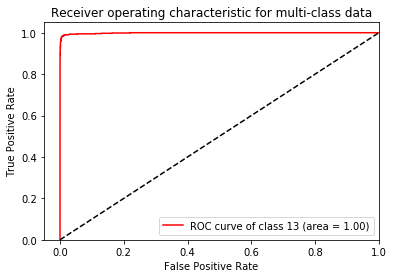

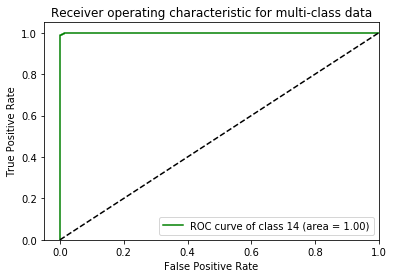

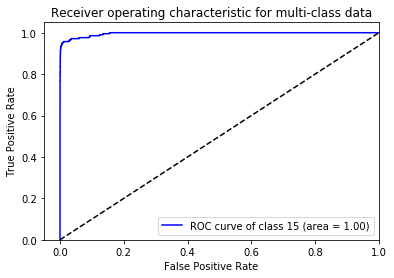

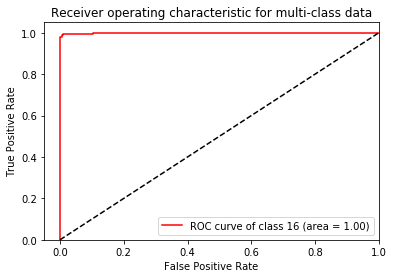

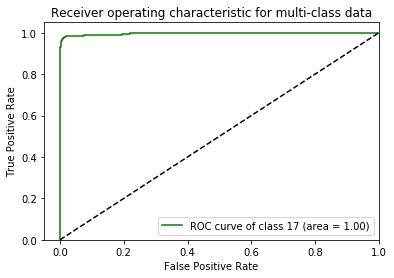

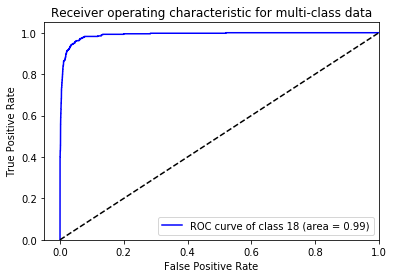

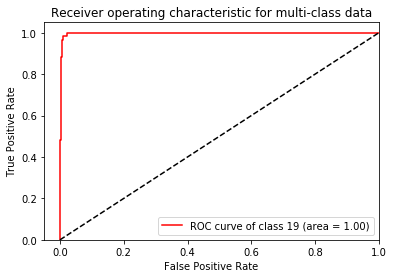

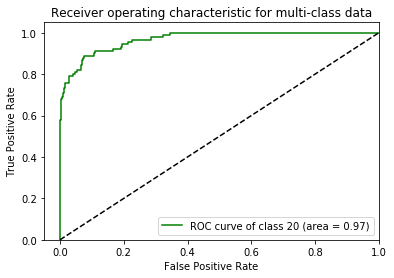

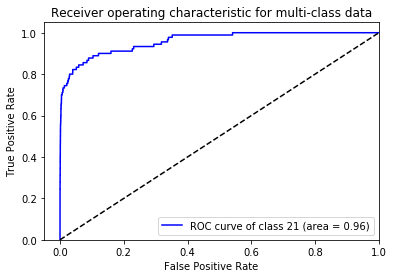

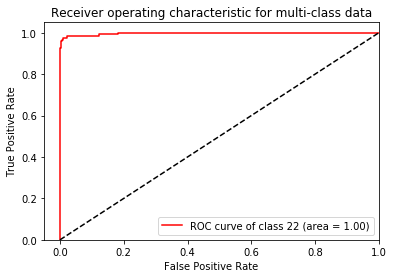

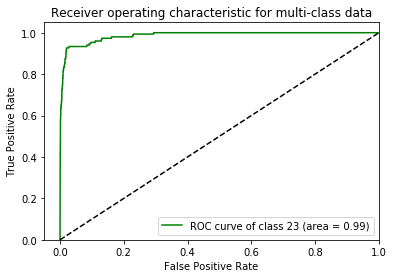

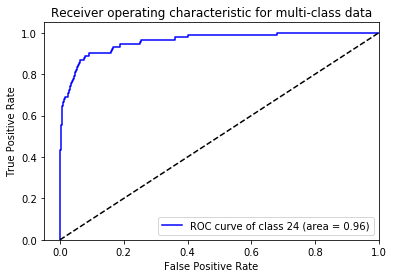

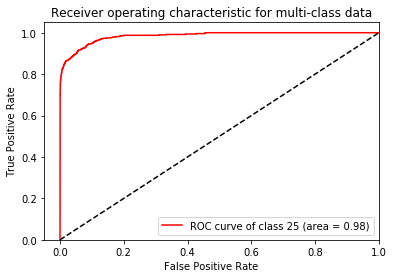

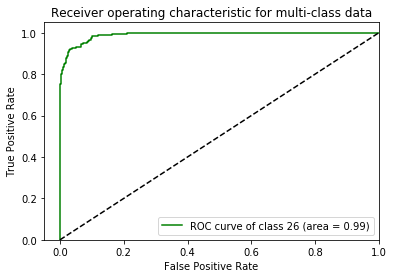

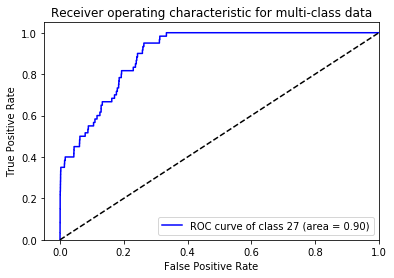

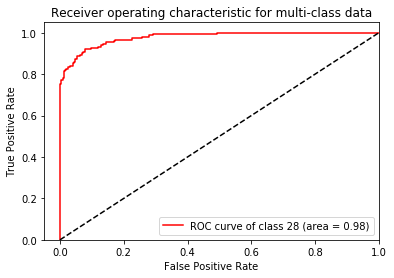

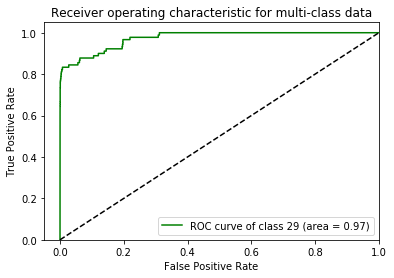

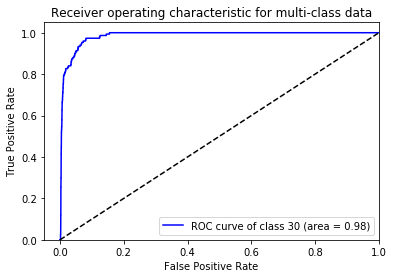

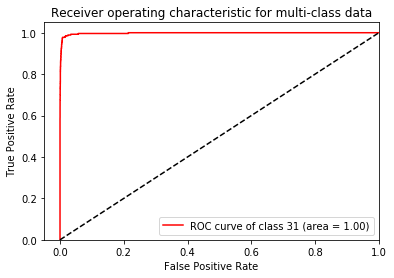

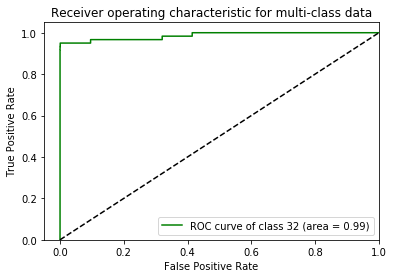

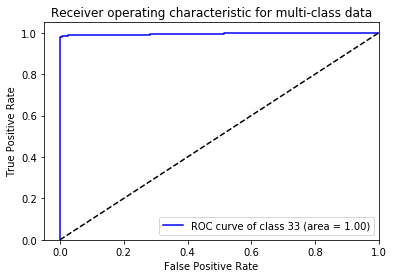

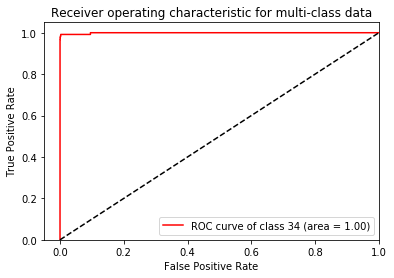

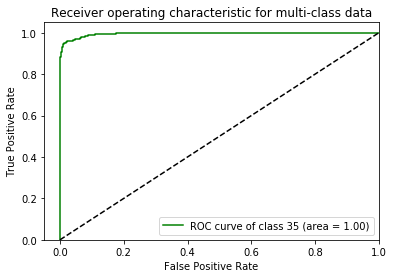

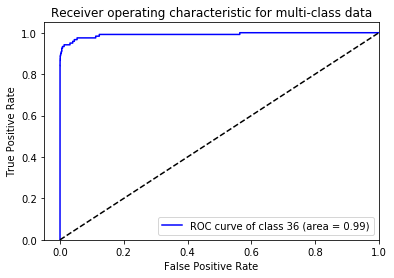

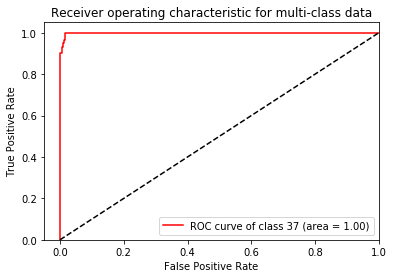

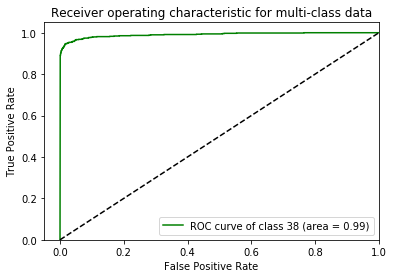

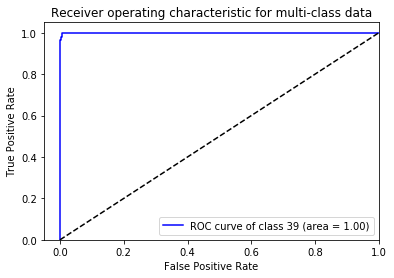

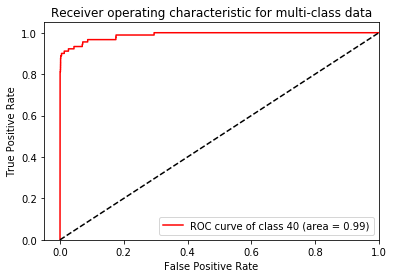

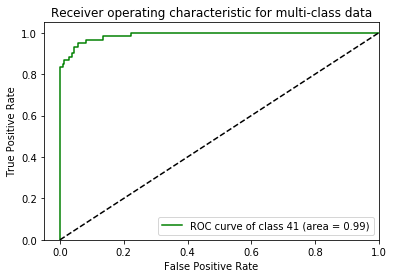

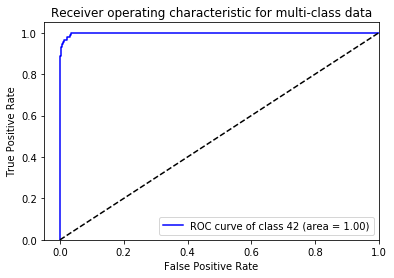

In [36]:
plot_ROC_AUC_individual(model, y_test=data['y_test'], x_test=data['x_test'], n_classes=43)

For now, we'll only note the poorest performing classes. Following training of the more finely tuned model below, we'll do a deeper dive into model performance and misclassification.

Next, we'll use our trained model to predict the target class of the test dataset, and evaluate the results using a classification report and confusion matrix. Moving forward, we'll also use the function defined below to evaluate/visualize training accuracy and loss for future models.

In [0]:
def model_predict_eval(model, x_input, y_true, batch_size, history, graph_cnf=False):
    '''Predict targets for given model, visualize classification report, visualize'''
    # Predict:
    y_pred = model.predict(x_input, batch_size=batch_size, verbose=1)
    y_pred_bool = np.argmax(y_pred, axis=1)
    
    # Evaluate:
    model_classification_report = print(classification_report(data['y_test'], y_pred_bool))
    
    # Plot Accuracy, Loss:
    print(plot_model_acc_loss(history))

    #CnF Matix:
    cnf_matrix = confusion_matrix(y_pred_bool, data['y_test'])
    print('Confusion Matrix:\n', cnf_matrix)
    
    # Graph CNF:
    if graph_cnf == True:
        plt.figure(figsize=(43, 43))
        plot_confusion_matrix(cnf_matrix, classes=(range(0,43)), normalize=False, title='CNF Matrix')
        plt.show()
    
    return model_classification_report

12630/12630 [==============================] - 1s 52us/step
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        60
           1       0.75      0.88      0.81       720
           2       0.87      0.74      0.80       750
           3       0.73      0.63      0.68       450
           4       0.91      0.74      0.82       660
           5       0.61      0.78      0.68       630
           6       0.85      0.84      0.84       150
           7       0.90      0.64      0.75       450
           8       0.68      0.84      0.75       450
           9       0.95      0.96      0.95       480
          10       0.97      0.90      0.94       660
          11       0.86      0.83      0.85       420
          12       0.99      0.86      0.92       690
          13       0.97      0.95      0.96       720
          14       1.00      0.98      0.99       270
          15       0.85      0.94      0.89       210
          16       0.

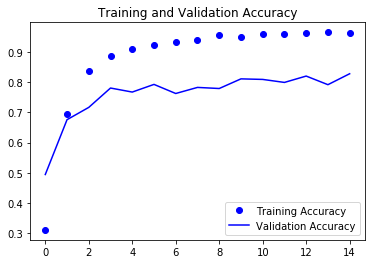

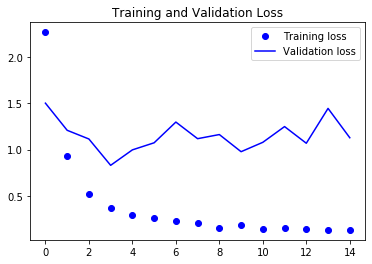

None
Confusion Matrix:
 [[ 30   4   6 ...   0   0   0]
 [ 15 633  59 ...   0   0   0]
 [  0  23 554 ...   0   0   0]
 ...
 [  0   0   1 ...  76   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  79]]


In [38]:
model_predict_eval(model=model, history=history, x_input=data['x_test'], \
                   y_true=data['y_test'], batch_size=32, graph_cnf=False)

In conclusion, we observe that the "shallow" CNN actually performs relatively well (weighted f1 score: 0.82) when used to predict target class of street signs in the training dataset, but not so well on novel images from the testing data subset. Based on the visualizations above, we can conclude that the baseline model is overfitted.



### Tuned Model

Next, let's repeat the process using a more robust CNN, and take a closer look at the results. To begin, we'll define a new function:

In [0]:
# Build / Compile Analytics Model:
def compile_model(optimizer, loss):
    '''Builds/Compiles deeper CNN, with user defined optimizer/loss'''
    # Build Superior Model
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
    #model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation='relu'))
    model.add(Dropout(.35))
    model.add(layers.Dense(256, activation='relu'))
    model.add(Dropout(.35))
    model.add(layers.Dense(128, activation='relu'))
    model.add(Dropout(.25))
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(.2))
    model.add(layers.Dense(43, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [56]:
model = compile_model(optimizer='adam', loss='categorical_crossentropy')
model.summary() #previewing model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 500)              

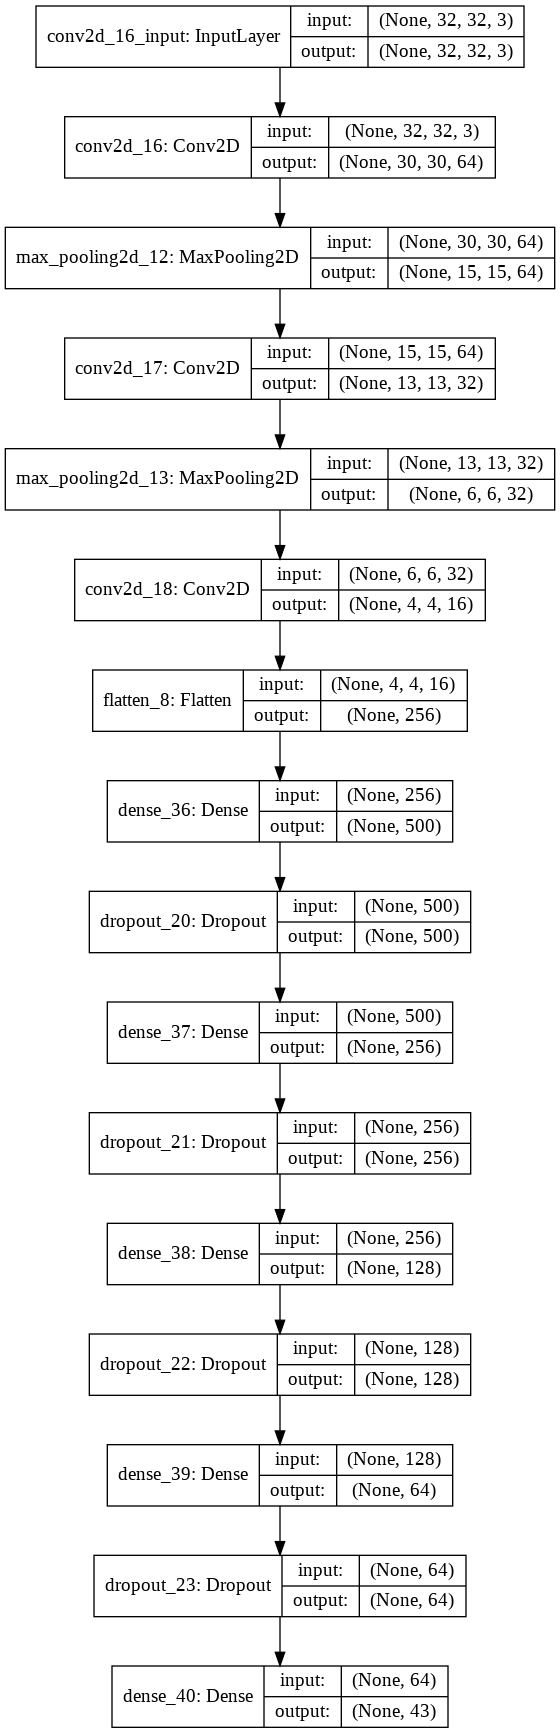

In [57]:
keras.utils.plot_model(model, to_file='test_keras_plot_model2.png', show_shapes=True)
IPython.display.Image('test_keras_plot_model2.png')

In [60]:
history, model, _, _ = fit_model(model=model, x=data['x_train'], y=data['y_train'], sample_num=len(data['x_train']), batch_size=8, \
          epochs=10, validation_data=(data['x_validation'], data['y_validation']))

Train on 86989 samples, validate on 4410 samples
Epoch 1/10
86989/86989 [==============================] - 81s 932us/step - loss: 0.3386 - acc: 0.9119 - val_loss: 0.4561 - val_acc: 0.9025
Epoch 2/10
86989/86989 [==============================] - 82s 938us/step - loss: 0.3215 - acc: 0.9205 - val_loss: 0.3757 - val_acc: 0.9181
Epoch 3/10
86989/86989 [==============================] - 81s 932us/step - loss: 0.3090 - acc: 0.9248 - val_loss: 0.3818 - val_acc: 0.9138
Epoch 4/10
86989/86989 [==============================] - 81s 933us/step - loss: 0.3053 - acc: 0.9280 - val_loss: 0.2949 - val_acc: 0.9272
Epoch 5/10
86989/86989 [==============================] - 81s 934us/step - loss: 0.3091 - acc: 0.9291 - val_loss: 0.4466 - val_acc: 0.9122
Epoch 6/10
86989/86989 [==============================] - 82s 940us/step - loss: 0.3274 - acc: 0.9273 - val_loss: 0.4148 - val_acc: 0.9138
Epoch 7/10
86989/86989 [==============================] - 82s 940us/step - loss: 0.3439 - acc: 0.9246 - val_loss: 0.3

With training complete, let's now view the intermediate activations produced by the model as well as plot the ROC curves for target classes:

In [79]:
# Plotting intermediate activations:
classifier = Sequential()
classifier.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(32, (3, 3), activation='relu'))
classifier.add(layers.MaxPooling2D((2, 2)))
classifier.add(layers.Conv2D(16, (3, 3), activation='relu'))
classifier.add(layers.Flatten())
classifier.add(layers.Dense(500, activation='relu'))
classifier.add(Dropout(.35))
classifier.add(layers.Dense(256, activation='relu'))
classifier.add(Dropout(.35))
classifier.add(layers.Dense(128, activation='relu'))
classifier.add(Dropout(.25))
classifier.add(layers.Dense(64, activation='relu'))
classifier.add(Dropout(.2))
classifier.add(layers.Dense(43, activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training:
history = classifier.fit(
    x = data['x_train'], 
    y = data['y_train'],
    batch_size=10,
    epochs=15,
    validation_data=(data['x_validation'], data['y_validation']))

Train on 86989 samples, validate on 4410 samples
Epoch 1/15
86989/86989 [==============================] - 69s 788us/step - loss: 1.4308 - acc: 0.5441 - val_loss: 0.5847 - val_acc: 0.8152
Epoch 2/15
86989/86989 [==============================] - 67s 768us/step - loss: 0.4636 - acc: 0.8650 - val_loss: 0.3166 - val_acc: 0.9109
Epoch 3/15
86989/86989 [==============================] - 67s 772us/step - loss: 0.3349 - acc: 0.9107 - val_loss: 0.3055 - val_acc: 0.9170
Epoch 4/15
86989/86989 [==============================] - 66s 764us/step - loss: 0.2916 - acc: 0.9252 - val_loss: 0.2597 - val_acc: 0.9340
Epoch 5/15
86989/86989 [==============================] - 66s 758us/step - loss: 0.2744 - acc: 0.9324 - val_loss: 0.2391 - val_acc: 0.9376
Epoch 6/15
86989/86989 [==============================] - 66s 758us/step - loss: 0.2641 - acc: 0.9376 - val_loss: 0.3110 - val_acc: 0.9218
Epoch 7/15
86989/86989 [==============================] - 67s 765us/step - loss: 0.2616 - acc: 0.9388 - val_loss: 0.3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


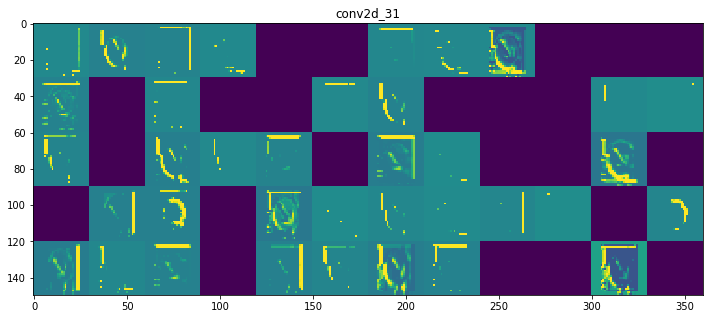

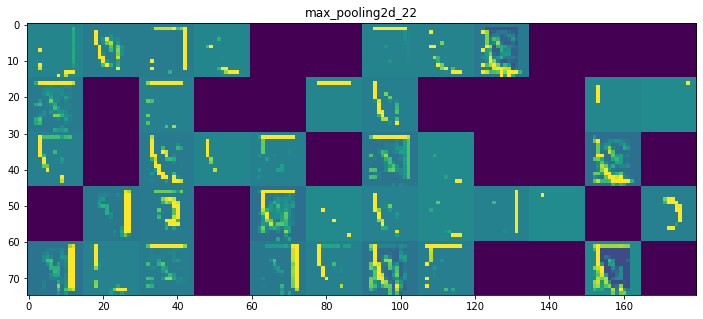

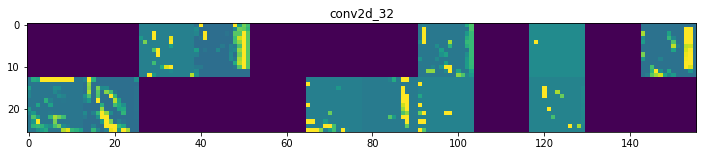

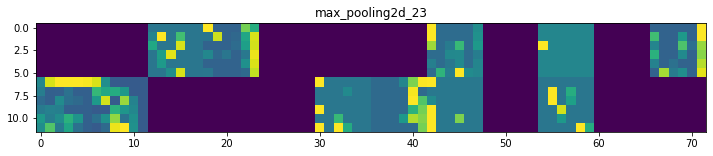

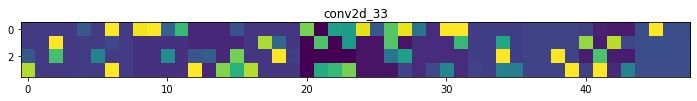

In [83]:
img = im.imread('example.jpg')
img.shape

# Loading/Preprocessing our example:
img_path='example.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Selecting outputs of classifier:
layer_outputs = [layer.output for layer in classifier.layers[:5]] 
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

# Code for visualization obtained from:
# https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md
layer_names2 = []
for layer in classifier.layers[:6]:
    layer_names2.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 12

for layer_name, layer_activation in zip(layer_names2, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

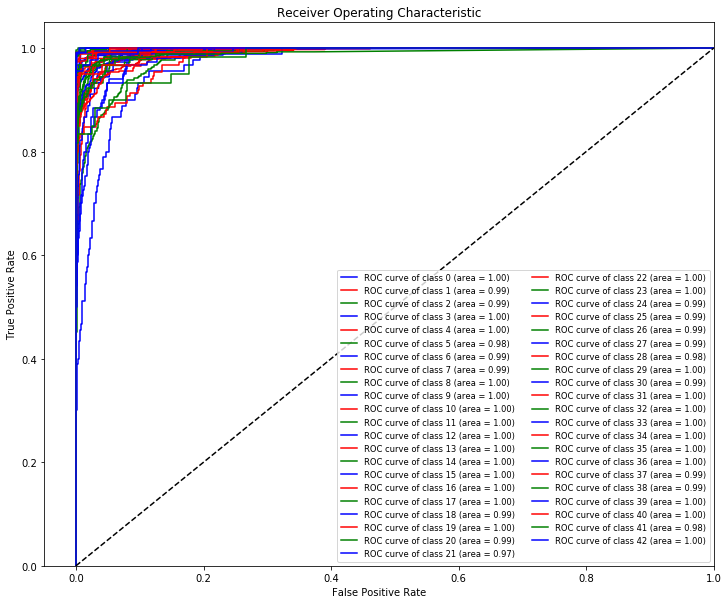

In [63]:
# Plotting ROC Curves:
plot_ROC_AUC_all(model=model, y_test=data['y_test'], x_test=data['x_test'], n_classes=43)

Observing the figure above, it is evident that this model was able to much more accurately classify street signs into their appropriate classes. However, we see a few outliers in performance. Next, we'll plot the ROC curves of each individual class to visualize outliers in performance more clearly.

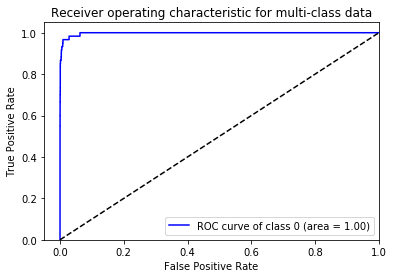

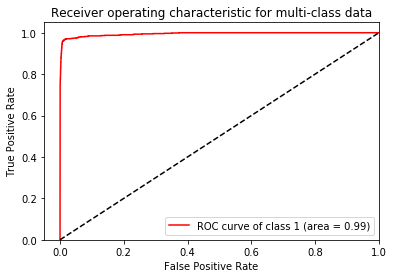

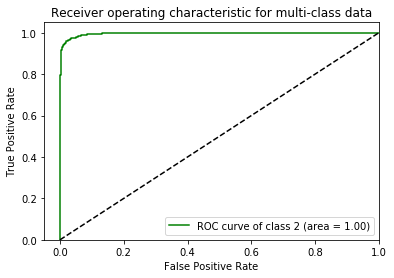

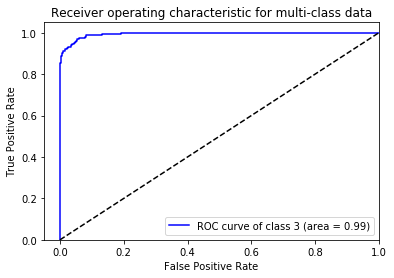

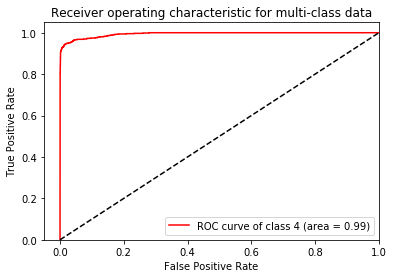

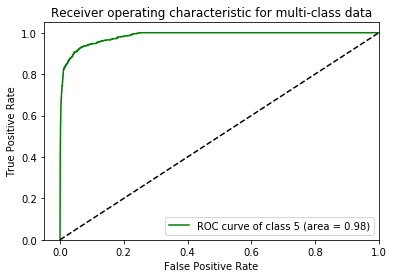

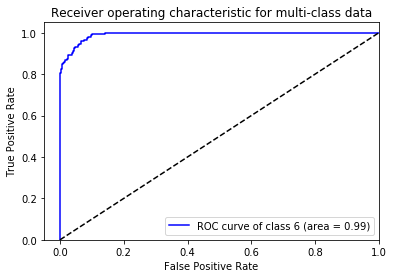

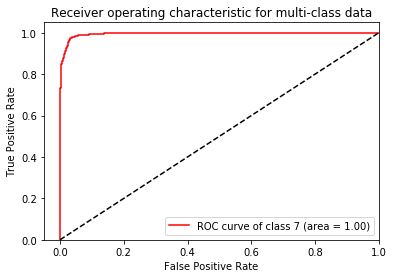

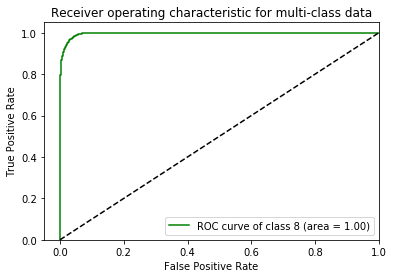

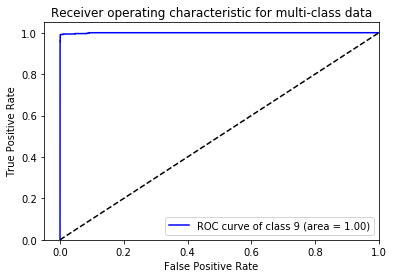

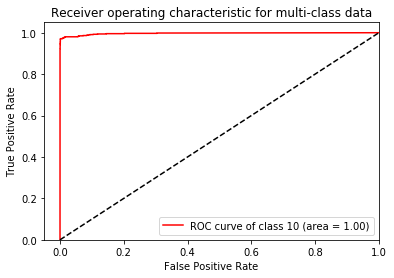

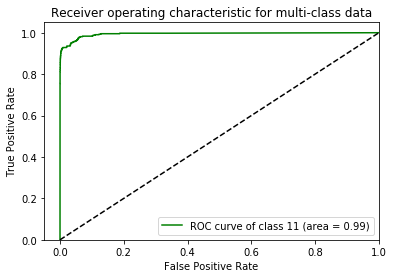

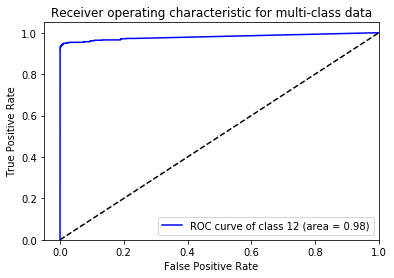

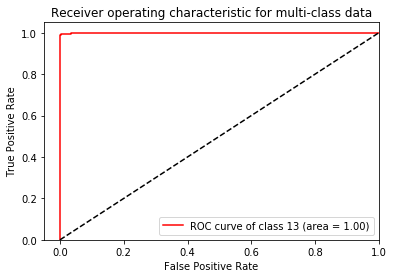

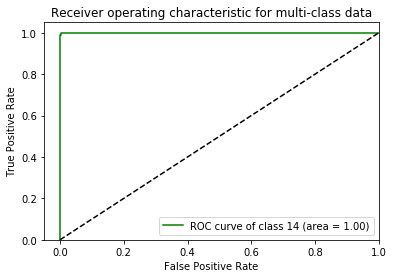

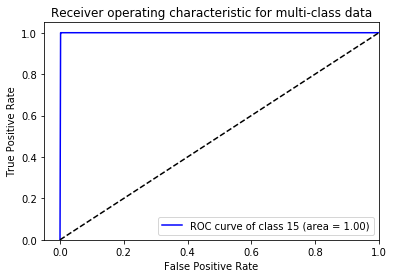

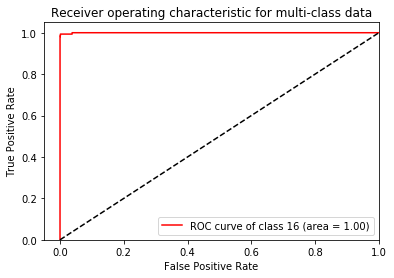

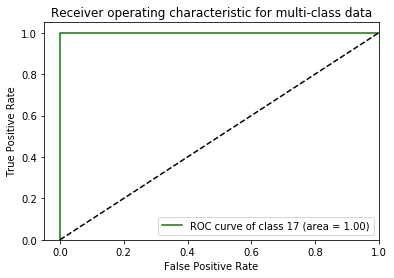

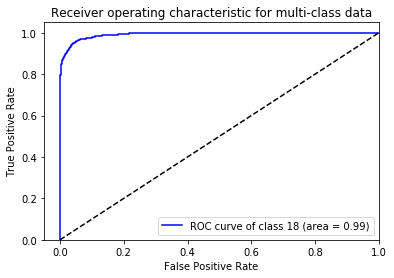

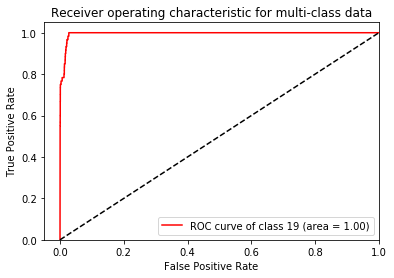

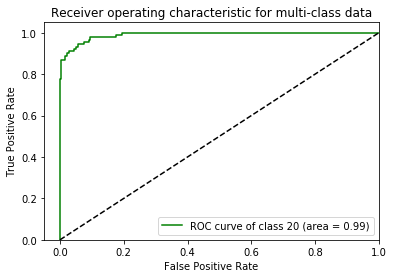

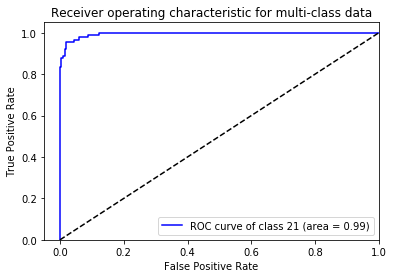

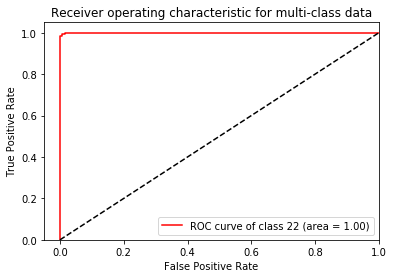

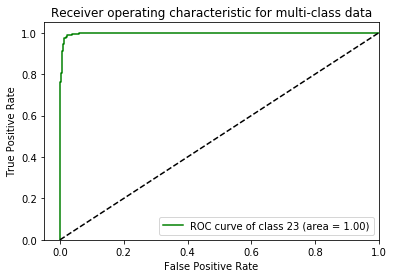

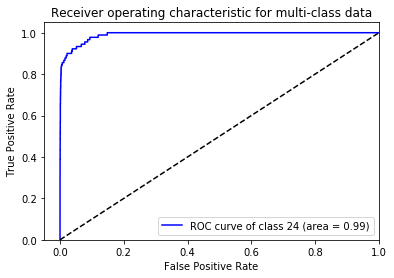

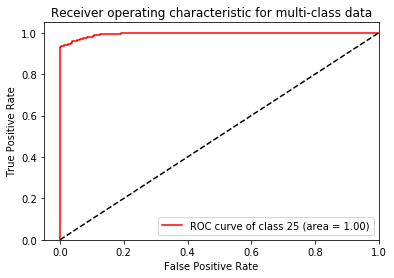

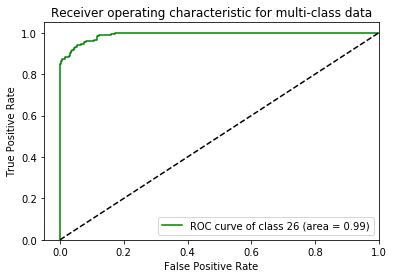

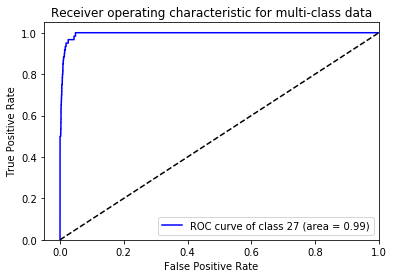

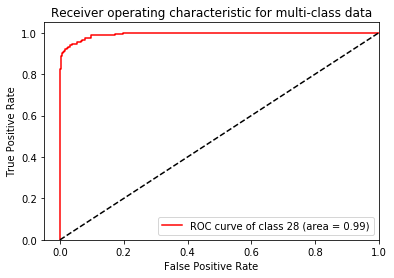

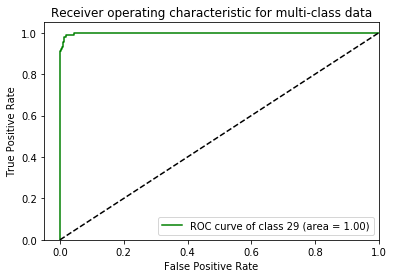

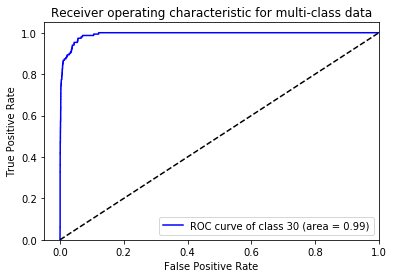

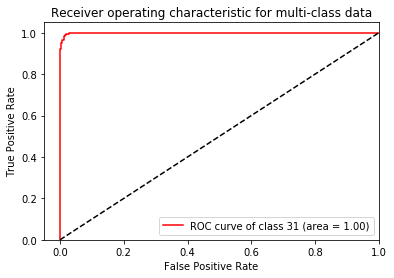

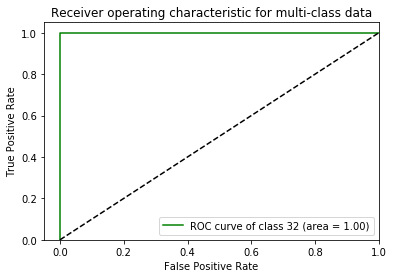

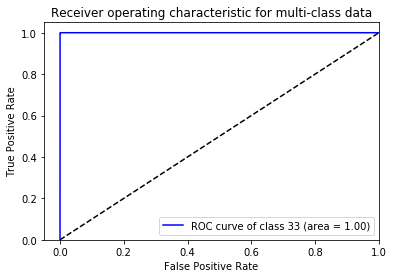

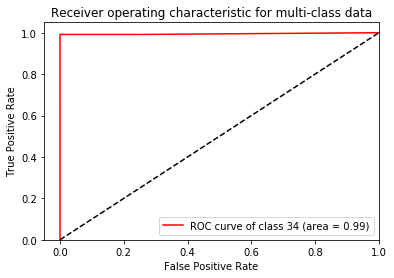

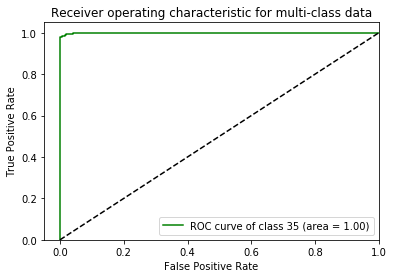

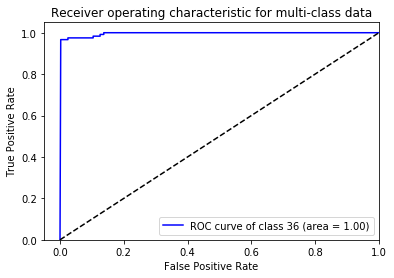

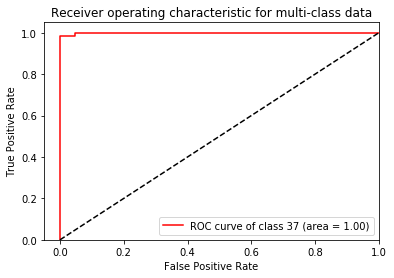

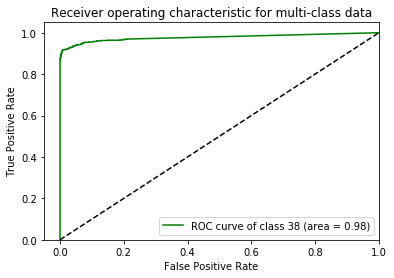

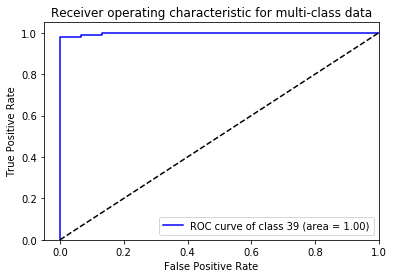

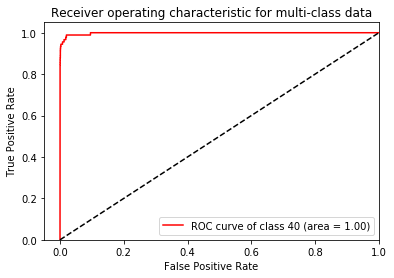

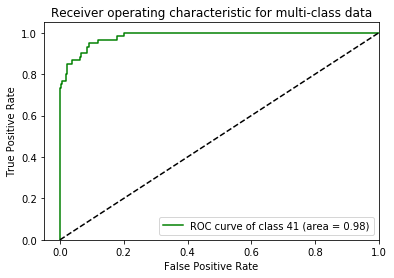

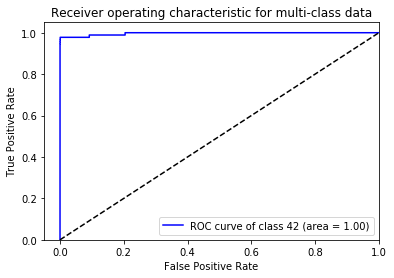

In [0]:
plot_ROC_AUC_individual(model, y_test=data['y_test'], x_test=data['x_test'], n_classes=43)

While the curve for class 41 appears to perform slightly worse than other classes in the dataset, closer investigation is required. Next, we'll visualize the confusion matrix for the model, as well as review the model's classification report, containing the support and f1 score for each target class.

12630/12630 [==============================] - 1s 66us/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        60
           1       0.87      0.96      0.91       720
           2       0.94      0.90      0.92       750
           3       0.93      0.86      0.89       450
           4       0.97      0.90      0.93       660
           5       0.73      0.83      0.78       630
           6       0.97      0.80      0.88       150
           7       0.88      0.85      0.86       450
           8       0.87      0.86      0.87       450
           9       0.97      0.99      0.98       480
          10       0.98      0.97      0.97       660
          11       0.98      0.85      0.91       420
          12       0.99      0.93      0.96       690
          13       1.00      0.98      0.99       720
          14       0.99      0.99      0.99       270
          15       0.89      1.00      0.94       210
          16       0.

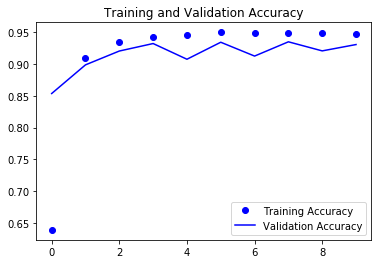

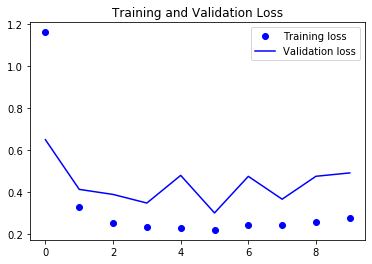

None
Confusion Matrix:
 [[ 49   7   0 ...   0   0   0]
 [  9 691  35 ...   0   0   0]
 [  0   5 677 ...   0   0   0]
 ...
 [  0   0   0 ...  83   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   0  88]]
Confusion Matrix, without Normalization
[[ 49   7   0 ...   0   0   0]
 [  9 691  35 ...   0   0   0]
 [  0   5 677 ...   0   0   0]
 ...
 [  0   0   0 ...  83   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   0  88]]


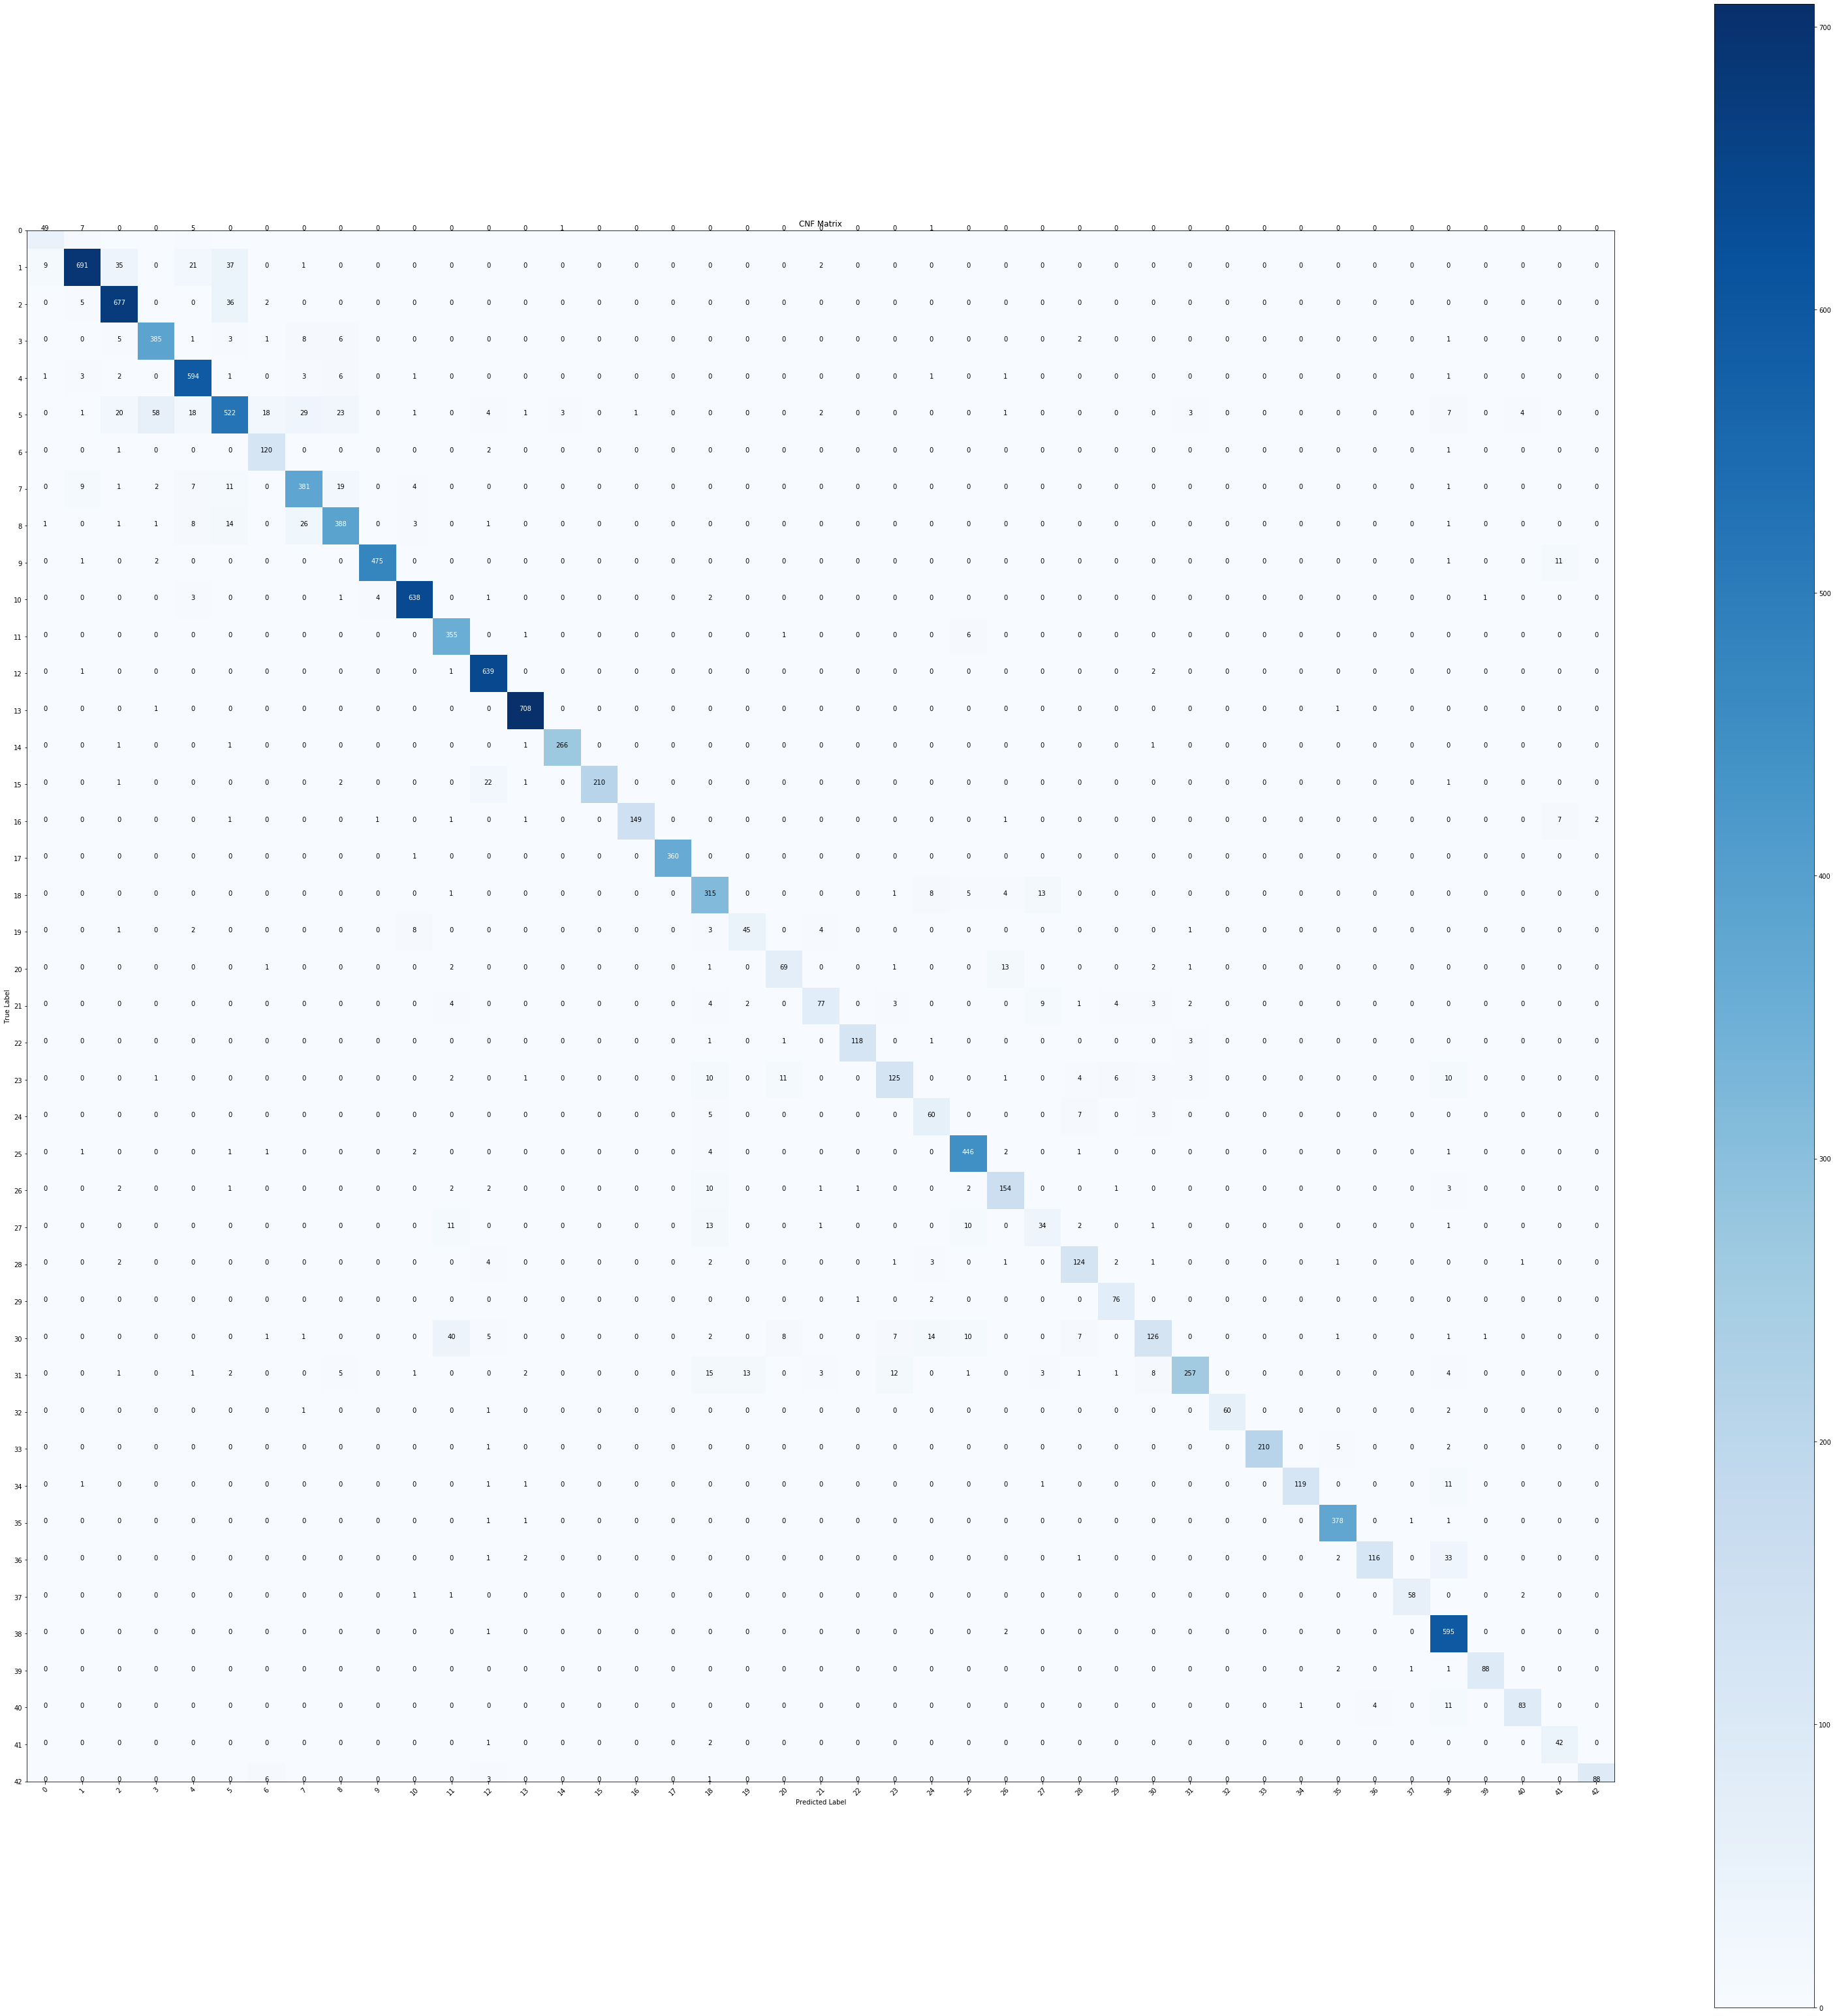

In [0]:
model_predict_eval(model=model, history=history, x_input=data['x_test'], y_true=data['y_test'], batch_size=32, graph_cnf=True)

Next, we'll review the model's classification report by converting to a dataframe and visualizing.

In [0]:
def transfer_model_reporter(model, X_test, y_test):
  '''Takes in transfer learning model, X_test, and y_test
  and visualizes classification report data'''

  # Saving Classification Report
  # Predict:
  y_pred = model.predict(data['x_test'], batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)

  # Evaluate:
  resnet_report = classification_report(data['y_test'], y_pred_bool, output_dict=True)
  
  # Convert classificaton report to DataFrame object:
  resnet_df = pd.DataFrame.from_dict(data=resnet_report).transpose()

  # Segment report averages into separate DataFrame:
  resnet_df_agg = resnet_df.iloc[-3:]

  # Segment individual class reports into DataFrame:
  resnet_df = resnet_df.iloc[:-3]
  resnet_df['SignName'] = label_names_df['SignName'].values

  # Changing column name to remove '-' character:
  resnet_df.rename(columns={'f1-score': 'f1_score'}, inplace=True)
  resnet_df_num = resnet_df.drop(['SignName'], axis=1)

  # Plotting class score hist:
  resnet_df_num.hist()

  fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
  resnet_df.support.value_counts().plot(kind='bar', ax=axes[0])
  sns.barplot(x=resnet_df.SignName, y=resnet_df.support, ax=axes[1])
  axes[0].set_title('Support and Number of Target Classes')
  plt.xticks(rotation=75, ha='right')

  plt.title('Support by Class')
  plt.show()


  # Plotting Correlation Between Support and F1 Score
  fig2 = plt.figure(constrained_layout=False, figsize=(14,10))
  plt.title('Correlation Between Class Support and F1 Score')
  plt.xticks(rotation=75, ha='right')
  ax = sns.regplot(data=resnet_df_num, x='support', y='f1_score')
  plt.show()

  return resnet_df, resnet_df_num

12630/12630 [==============================] - 1s 66us/step


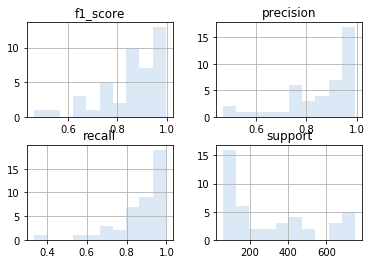

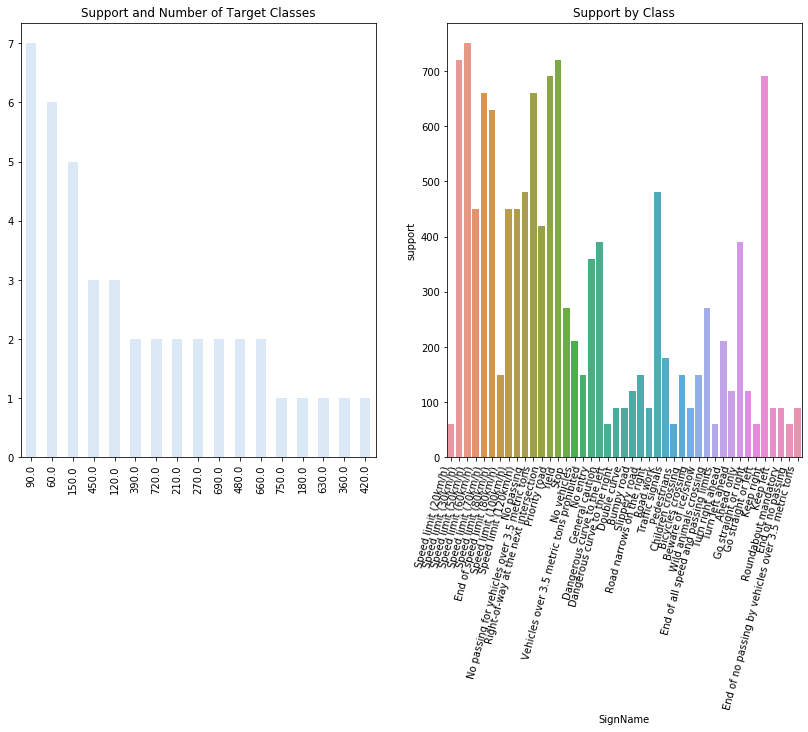

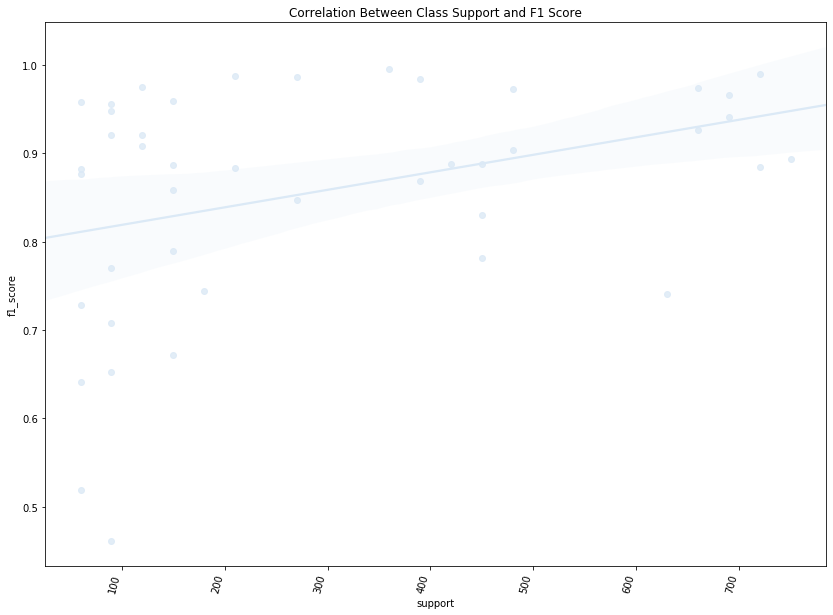

In [62]:
resnet_df, resnet_df_num = transfer_model_reporter(model=model, X_test=data['x_test'], y_test=data['y_test'])

From the visualization above, we see a class imbalance in the testing datas subset along with a positive correlation between class support and F1 score. However, because class imbalance was addressed prior to model training, we would not normally expect class support to effect performance.

Overall, the model above produced an average accuracy of 0.91. We can also see that the distributions for f1 score, precision, and recall are all strongly negatively skewed, indicating that most of the classes performed well (>.95), with a few poorly performing outliers amongst target classes.

Below, we'll take a closer look at the poorest performing classes, as well as visualize samples of images that were misclassified by our model.

In [64]:
resnet_df

,precision,recall,f1_score,support,SignName
0,0.479339,0.966667,0.640884,60.0,Speed limit (20km/h)
1,0.939158,0.836111,0.884644,720.0,Speed limit (30km/h)
2,0.865169,0.924000,0.893617,750.0,Speed limit (50km/h)
3,0.836935,0.946667,0.888425,450.0,Speed limit (60km/h)
4,0.919403,0.933333,0.926316,660.0,Speed limit (70km/h)
5,0.733645,0.747619,0.740566,630.0,Speed limit (80km/h)
6,0.940299,0.840000,0.887324,150.0,End of speed limit (80km/h)
7,0.903790,0.688889,0.781841,450.0,Speed limit (100km/h)
8,0.779727,0.888889,0.830737,450.0,Speed limit (120km/h)
9,0.965164,0.981250,0.973140,480.0,No passing


From this report, we'll select the 5 worst performing classes.

In [65]:
resnet_df.f1_score.nsmallest(5)

21    0.461538
27    0.518519
0     0.640884
24    0.653061
30    0.671533
Name: f1_score, dtype: float64

In [66]:
resnet_df.iloc[[27,30,19,24,23]]

,precision,recall,f1_score,support,SignName
27,0.466667,0.583333,0.518519,60.0,Pedestrians
30,0.741935,0.613333,0.671533,150.0,Beware of ice/snow
19,0.741379,0.716667,0.728814,60.0,Dangerous curve to the left
24,0.603774,0.711111,0.653061,90.0,Road narrows on the right
23,0.845161,0.873333,0.859016,150.0,Slippery road


The classification report above shows that the model performed worst when classifying images of the following signs:
- Pedestrians

- Beware of ice/snow

- Dangeroud curve to the left

- Road narrows on the right

- Slippery Road

Next, let's take a closer look at a few of the images that were misclassified by our CNN:

12630/12630 [==============================] - 0s 37us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


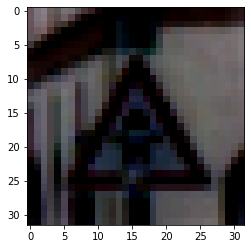

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


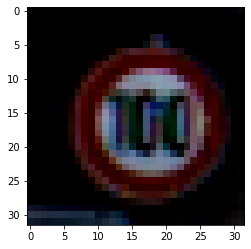

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


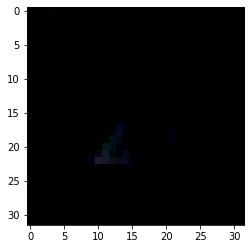

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


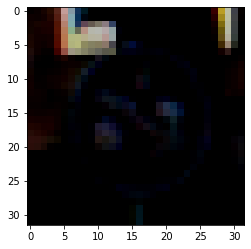

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


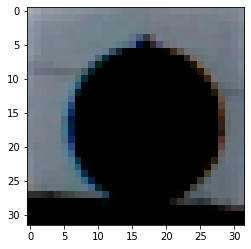

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


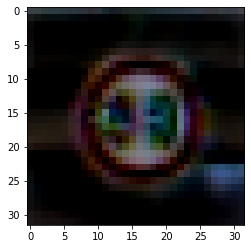

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


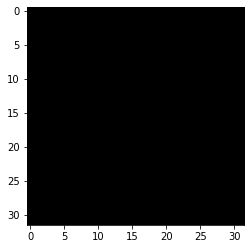

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


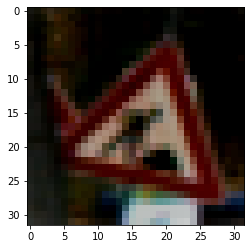

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


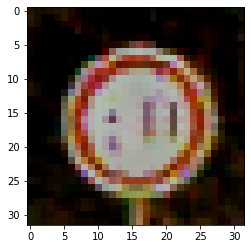

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


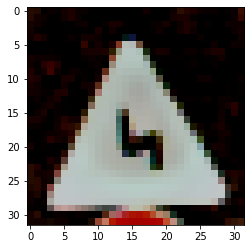

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


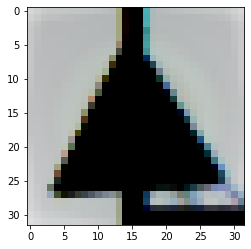

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


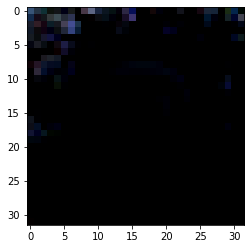

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


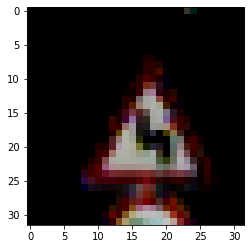

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


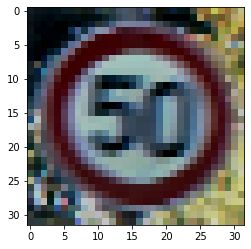

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


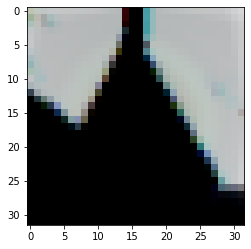

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


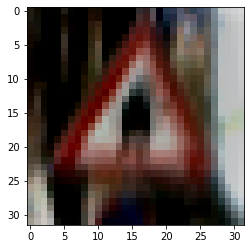

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


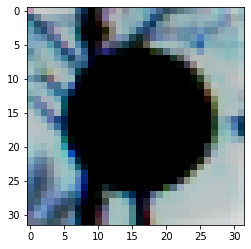

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


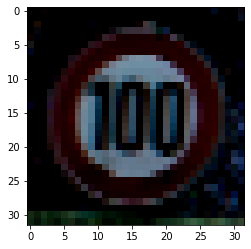

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


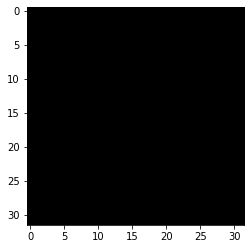

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


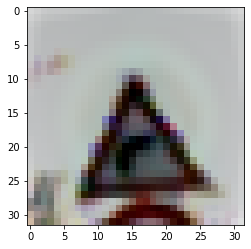

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


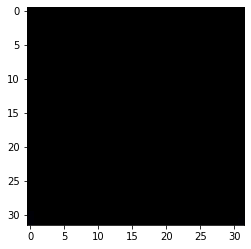

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


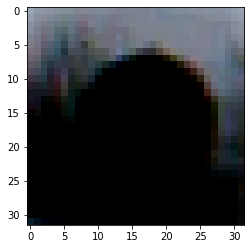

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


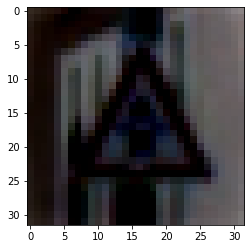

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


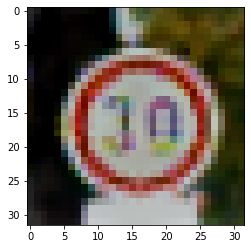

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


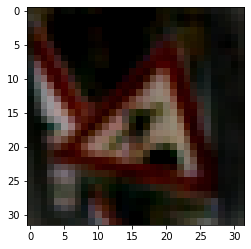

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


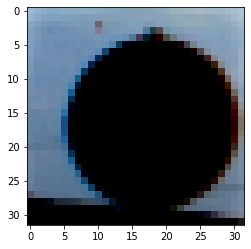

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


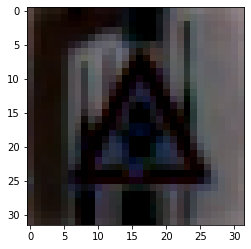

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


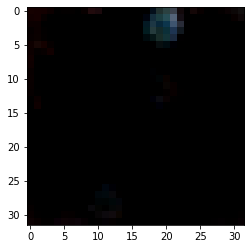

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


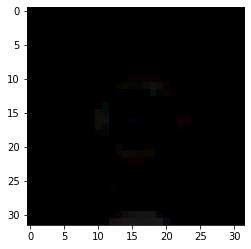

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


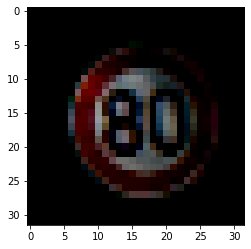

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


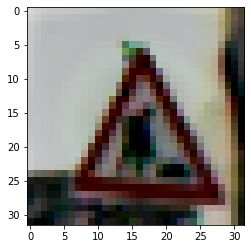

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


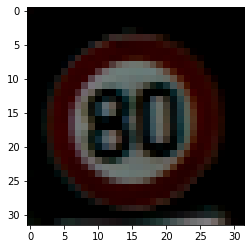

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


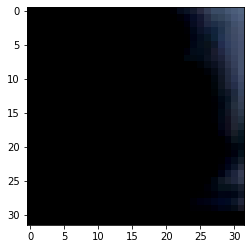

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


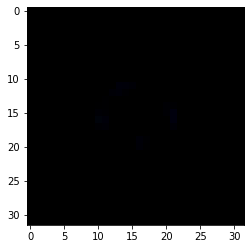

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


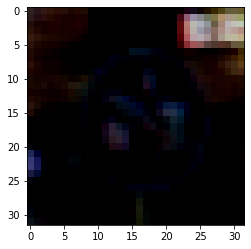

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


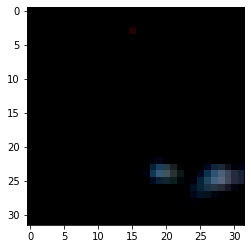

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


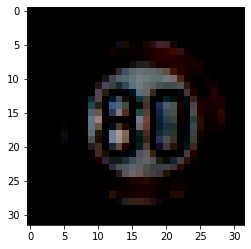

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


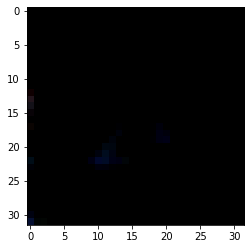

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


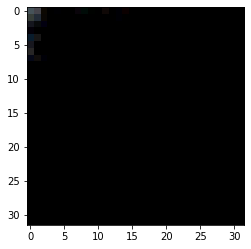

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


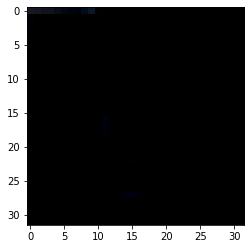

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


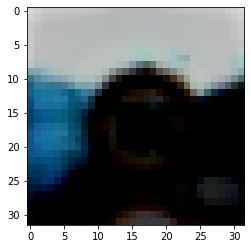

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


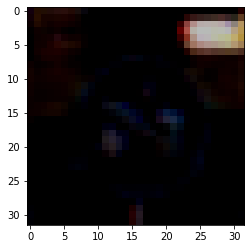

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


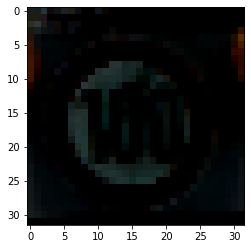

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


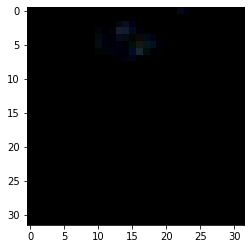

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


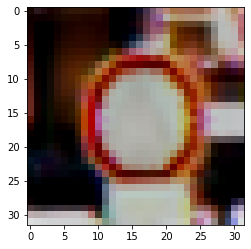

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


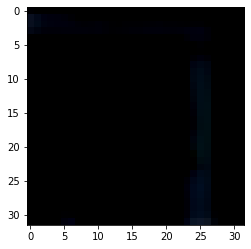

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


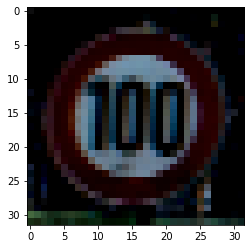

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


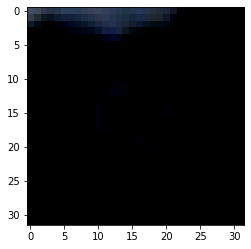

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


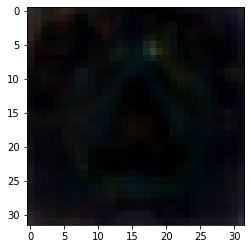

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


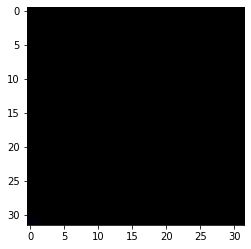

In [77]:
# Visualizing Misclassified Street Signs for the first 500 model predictions:
y_pred = model.predict(data['x_test'], batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

for i, pred in enumerate(y_pred_bool[0:500]):
  # Get label pred
  y_pred = y_pred_bool[i]
  # Get label actual
  actual = data['y_test'][i]
  image_data = data['x_test'][i]

  if y_pred != actual:
    ax = plt.imshow(image_data)
    plt.show()

## Analysis:

Based on the images above, we can reasonably conclude that most of the images misclassified by the model are either extremely dark, or very blurry. There are a few reasons for this, and these results also guide our next steps.

In order to reduce training time, the images used to train/evaluate the model have been scaled down to dimensions of 32x32x3. For images with fewer pixels, sometimes edges, colors, and detail are less apparent when compared with photos of higher quality.

In addition to reduction in scale, the images in the dataset were pre-processed before being used in modeling/prediction, including changes to image brightness, class distribution for target data subset, amongst other techniques. To improve model performance, different pre-processing techniques could be used on the misclassified images in order to increase brightness and contrast, likely resulting in a marked improvement in classification for many of the images in the dataset.

## Ethical Considerations:
When reviewing the worst performing classes from the model output above, I immediately noticed that the worst performing target class is Pedestrian Crossing. As mentioned in the background, not all signs have the same "value". For example, in the absence of a perfectly reliable model, misclassifying a Pedestrian Crossing sign likely carries a much higher danger than misclassifying a sign designating the speed limit, for example.

In a real world context, this issue becomes much more complicated than simply classifying signs. In the context of self-driving, objects of many many types, from many angles, at high speeds, must all be processed, classified, and acted upon extremely reliably.

## Future Improvements:

In a future experiment, one might consider evaluating misclassified images more closely and applying additional pre-processing steps to improve model classification. For example, many of the images above appear to be too dark to identify. In addition to implementing additional/different pre-processing steps to the input data, each sign could be given an importance score, and the model could be retrained in order to err on the side of caution when classifying an image. Or, in other words, if the model predicts a sign is ~equally likely to be an "important" sign, such as a pedestrian crossing sign, model weights would be used to err on the side of caution, predicting the more critical sign. Performance could then be re-evaluated in order to determine the effect on model accuracy and recall, and also to assess whether any trade-offs in accuracy would be offset by an improvement to classification of more critical signs.

Additionally, transfer learning could be used in order to apply powerful convolutonal framework with existing frameworks such as Resnet50 or VGG19. In order to reduce training time, the top layers of the transfer learning model could be frozen in order to apply their weights without using the entire model structure for training, a very time/resource intensive process.